# Importing Necessary Libraries and Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning and Preprocessing

In [2]:
df= pd.read_csv('Nepali_Treking.csv')

In [3]:
df.head()

Unnamed: 0                                 Trek              Cost  \
0           0               Everest Base Camp Trek  \n$1,420     USD   
1           1         Everest Base Camp Short Trek  \n$1,295     USD   
2           2  Everest Base Camp Heli Shuttle Trek       \n$2000 USD   
3           3          Everest Base Camp Heli Trek  \n$3,300     USD   
4           4   Everest Base Camp Trek for Seniors  \n$1,800     USD   

       Time Trip Grade Max Altitude      Accomodation  \
0   16 Days   Moderate       5545 m  Hotel/Guesthouse   
1   14 Days   Moderate       5545 m  Hotel/Guesthouse   
2   12 Days   Moderate       5545 m  Hotel/Guesthouse   
3   11 Days   Moderate       5545 m  Hotel/Guesthouse   
4   20 Days   Moderate       5545 m  Hotel/Guesthouse   

           Best Travel Time Date of Travel         Sex  ...  GraduateOrNot  \
0  March - May & Sept - Dec      9/13/2022  Non-Binary  ...            Yes   
1  March - May & Sept - Dec       9/4/2021      Female  ...            Yes   
2  March - May & Sept - Dec      1/25/2021      Female  ...            Yes   
3  March - May & Sept - Dec      1/28/2022  Non-Binary  ...            Yes   
4  March - May & Sept - Dec     10/21/2021  Non-Binary  ...            Yes   

  AnnualIncome FamilyMembers  ChronicDiseases  FrequentFlyer  \
0       400000             6                1             No   
1      1250000             7                0             No   
2       500000             4                1             No   
3       700000             3                1             No   
4       700000             8                1            Yes   

   EverTravelledAbroad TravelInsurance  Year  Regional code      Country  
0                   No               0  2017              0        total  
1                   No               0  2017             40  Afghanistan  
2                   No               1  2017             80      Albania  
3                   No               0  2017            120      Algeria  
4                   No               0  2017            200        Andra  

[5 rows x 22 columns]

In [4]:
df.isnull().sum()

Unnamed: 0             0
Trek                   0
Cost                   0
Time                   0
Trip Grade             0
Max Altitude           0
Accomodation           0
Best Travel Time       0
Date of Travel         0
Sex                    0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
Year                   0
Regional code          0
Country                0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Trek', 'Cost', 'Time', 'Trip Grade', 'Max Altitude',
       'Accomodation', 'Best Travel Time', 'Date of Travel', 'Sex', 'Age',
       'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad',
       'TravelInsurance', 'Year', 'Regional code', 'Country'],
      dtype='object')

## Removing Unnecessary Columns

In [6]:
# Regional code
df=df.drop(['Regional code', 'Unnamed: 0'], axis=1)
df.columns

Index(['Trek', 'Cost', 'Time', 'Trip Grade', 'Max Altitude', 'Accomodation',
       'Best Travel Time', 'Date of Travel', 'Sex', 'Age', 'Employment Type',
       'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance', 'Year',
       'Country'],
      dtype='object')

## Cleaning Trek Column

In [7]:
df['Trek'].unique()

array(['Everest Base Camp Trek', 'Everest Base Camp Short Trek',
       'Everest Base Camp Heli Shuttle Trek',
       'Everest Base Camp Heli Trek',
       'Everest Base Camp Trek for Seniors', 'Everest Chola Pass Trek',
       'Gokyo Lake Renjo La Pass Trek', 'Everest High Passes Trek',
       'Short Everest Trek', 'Everest Panorama Trek', 'Everest View Trek',
       'Luxury Everest Base Camp Heli Trek',
       'Everest Base Camp Trek with Chola and Renjo La Pass',
       'Annapurna Base Camp Trek', 'Annapurna Base Camp Short Trek',
       'Instant Annapurna Base Camp Trek',
       'Annapurna Base Camp Heli Trek', 'Mardi Himal Trek',
       'Mardi Himal Trekking', 'Classic Annapurna Circuit Trek',
       'Annapurna Circuit Trek', 'Annapurna Circuit Short Trek',
       'Annapurna Luxury Trek', 'Annapurna Panorama Trek',
       'Annapurna Tilicho Lake Trek', 'Short Annapurna Trek',
       'Manaslu Circuit Trek', 'Manaslu Circuit Trekking',
       'Tsum Valley with Manaslu Trek', 'Upper 

In [8]:
# removing unwanted white spaces
df['Trek']= df['Trek'].str.strip()

In [9]:
df['Trek']=df['Trek'].str.replace('Nepal Trekking and', '')
df['Trek']= df['Trek'].str.replace('\xa0','')

In [10]:
# Splitting the values from 'trek', only keeping the first value and adding 'Trek' at the end
df['Trek'] = df['Trek'].str.strip().str.lower().str.split('trek').str[0].str.title()+ 'Trek'

This made the values uniform removing values that are other than the trek name, like 'for seniors', 'for youths'

In [11]:
df = df.rename(columns={'Trek': 'trek'})

In [12]:
df['trek'].unique()

array(['Everest Base Camp Trek', 'Everest Base Camp Short Trek',
       'Everest Base Camp Heli Shuttle Trek',
       'Everest Base Camp Heli Trek', 'Everest Chola Pass Trek',
       'Gokyo Lake Renjo La Pass Trek', 'Everest High Passes Trek',
       'Short Everest Trek', 'Everest Panorama Trek', 'Everest View Trek',
       'Luxury Everest Base Camp Heli Trek', 'Annapurna Base Camp Trek',
       'Annapurna Base Camp Short Trek',
       'Instant Annapurna Base Camp Trek',
       'Annapurna Base Camp Heli Trek', 'Mardi Himal Trek',
       'Classic Annapurna Circuit Trek', 'Annapurna Circuit Trek',
       'Annapurna Circuit Short Trek', 'Annapurna Luxury Trek',
       'Annapurna Panorama Trek', 'Annapurna Tilicho Lake Trek',
       'Short Annapurna Trek', 'Manaslu Circuit Trek',
       'Tsum Valley With Manaslu Trek', 'Upper Mustang Trek',
       'Upper Mustang Tiji Festival Trek', 'Langtang Valley Trek',
       'Langtang Gosaikunda Trek', 'Tamang Heritage Trek',
       'Tamang Heritage T

## Cleaning Cost Column

In [13]:
df['Cost']=df['Cost'].str.strip()

In [14]:
df['Cost'] = df['Cost'].astype(str)

In [15]:
df['Cost']= df['Cost'].replace({',':'', 'USD':'', '\$':''}, regex=True)
df['Cost'].unique()

array(['1420     ', '1295     ', '2000 ', '3300     ', '1800     ',
       '1720     ', '1450     ', '1950     ', '1060 ', '1150 ', '1100 ',
       '4200     ', '1900     ', '1090     ', '980     ', '1750     ',
       '850     ', '1350     ', '1250     ', '860     ', '590     ',
       '1380     ', '1850     ', '2150     ', '2300     ', '750     ',
       '1180     ', '920     ', '780     ', '1499     ', '1390     ',
       '1040     ', '1530     ', '1190     ', '3600     ', '1100     ',
       '450     ', '2100     ', '690     ', '1090    ', '980    ',
       '1750    ', '850    ', '1350    ', '1250    ', '1450    ',
       '860    ', '590    ', '1380    ', '1850    ', '2150    ',
       '2300    ', '750    ', '1180    ', '920    ', '780    ',
       '1499    ', '1390    ', '1040    ', '1530    ', '1190    ',
       '3600    ', '1100    ', '450    ', '2100    ', '690    ',
       '1090   ', '980   ', '1750   ', '850   ', '1350   ', '1250   ',
       '1450   ', '860   ', '590   ', '13

In [16]:
df['Cost']=df['Cost'].astype(float)
print(df['Cost'].dtype)
df=df.rename(columns={'Cost':'cost'})

float64


### Checking and Addressing Outliers

In [17]:
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

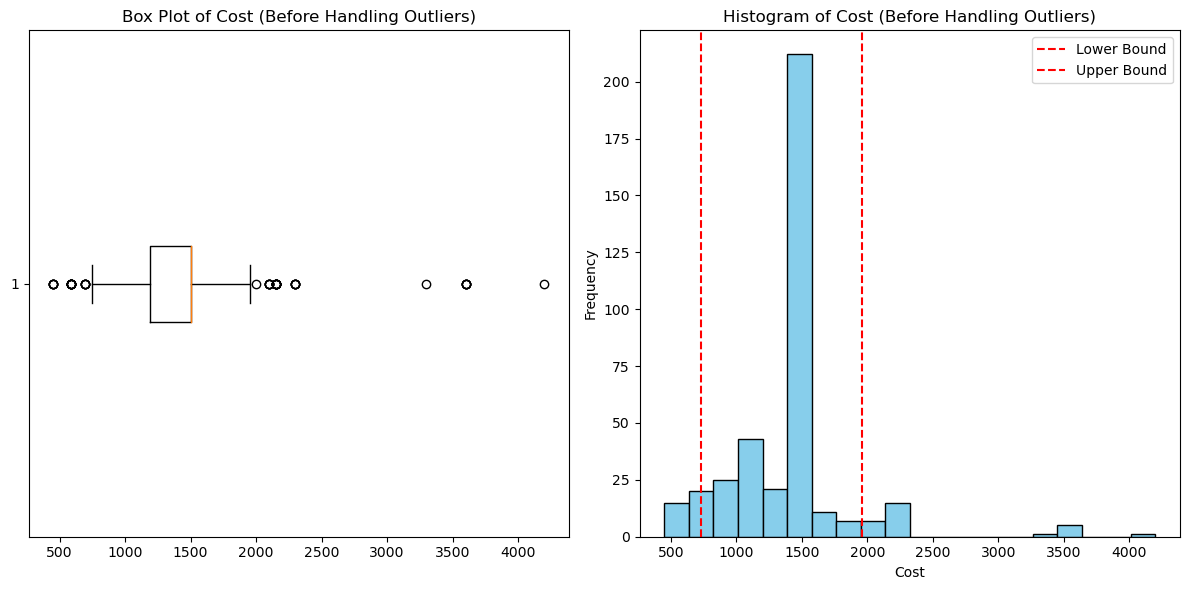

In [18]:
plt.figure(figsize=(12, 6))

# Box plot before handling outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['cost'].dropna(), vert=False)
plt.title('Box Plot of Cost (Before Handling Outliers)')

# Histogram before handling outliers
plt.subplot(1, 2, 2)
plt.hist(df['cost'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Histogram of Cost (Before Handling Outliers)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
df['Cost_Capped'] = np.where(df['cost'] < lower_bound, lower_bound,
                               np.where(df['cost'] > upper_bound, upper_bound, df['cost']))

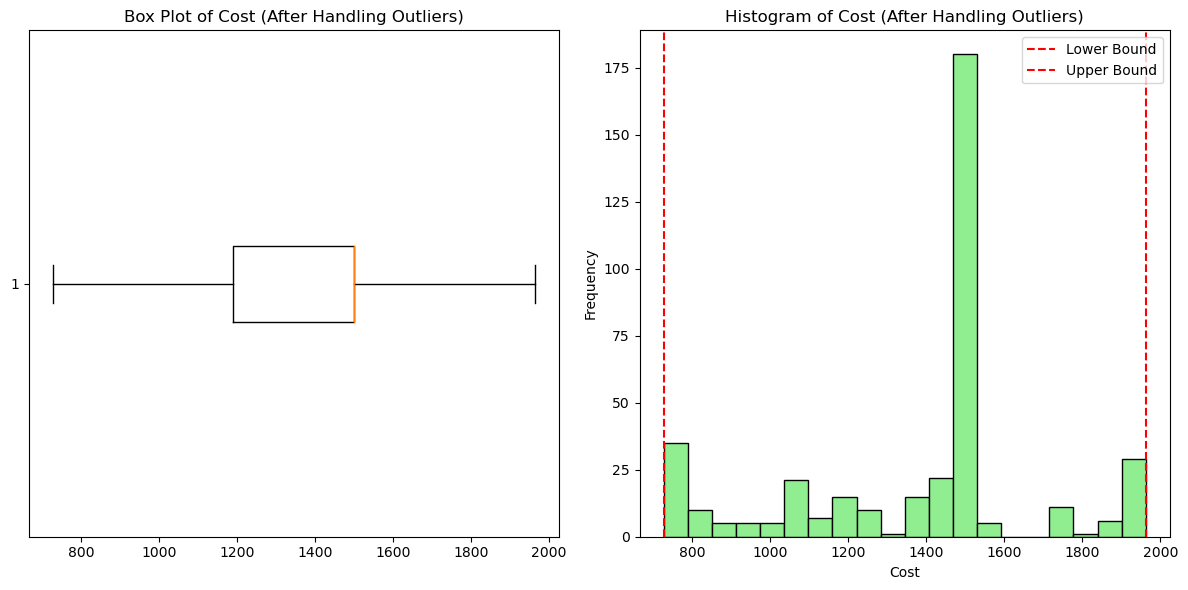

In [20]:
plt.figure(figsize=(12, 6))

# Box plot after handling outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['Cost_Capped'].dropna(), vert=False)
plt.title('Box Plot of Cost (After Handling Outliers)')
# Histogram after handling outliers
plt.subplot(1, 2, 2)
plt.hist(df['Cost_Capped'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Histogram of Cost (After Handling Outliers)')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Cleaning Time Column

In [21]:
df['Time']= df['Time'].str.strip()

In [22]:
df['Time'].unique()

array(['16 Days', '14 Days', '12 Days', '11 Days', '20 Days', '19 Days',
       '22 Days', '7 Days', '10 Days', '9 Days', '21 Days', '8 Days',
       '18 Days', '17 Days', '5 Days', '15 Days', '18 days', '25 Days',
       '27 Days', '13 Days'], dtype=object)

In [23]:
df['Time']= df['Time'].replace({'Days':'', 'days':''}, regex= True)

In [24]:
df['Time'].unique()

array(['16 ', '14 ', '12 ', '11 ', '20 ', '19 ', '22 ', '7 ', '10 ', '9 ',
       '21 ', '8 ', '18 ', '17 ', '5 ', '15 ', '25 ', '27 ', '13 '],
      dtype=object)

In [25]:
# converting datatype and renaming column
df['Time']= df['Time'].astype(int)
print(df['Time'].dtype)
df= df.rename(columns={'Time':'time'})

int32


## Cleaning Trip Grade Column

In [26]:
df['Trip Grade'].unique()

array(['Moderate', 'Strenuous', 'Easy To Moderate', 'Easy',
       'Moderate+Demanding', 'Demanding', 'Light+Moderate',
       'Demanding+Challenging', 'Light', 'Moderate-Hard', 'Easy-Moderate'],
      dtype=object)

In [27]:
grade_map = {
    'Easy': 1, 'Light': 1, 'Easy-Moderate': 1,
    'Moderate': 2, 'Easy To Moderate': 2, 'Moderate+Demanding': 2, 'Light+Moderate': 2,
    'Strenuous': 3, 'Moderate-Hard': 3, 'Demanding': 3,
    'Demanding+Challenging': 4
}

df['Trip Grade'] = df['Trip Grade'].str.strip()
df['Trip Grade'] = df['Trip Grade'].map(grade_map)

df['Trip Grade'].unique()

array([2, 3, 1, 4], dtype=int64)

In [28]:
# Renaming the column and checking if the column has been cleaned
df= df.rename(columns={'Trip Grade': 'trip_grade'})
df['trip_grade'].unique()
print(df['trip_grade'].dtype)

int64


## Cleaning Max Altitude Column

In [29]:
df['Max Altitude'].unique()

array(['5545 m', '5360 m', '3900 m', '3860 m', '4210 m', '4230 m',
       '4200 m', '4,200 m', '5416 m', '2012m', '3210 m', '1990 m',
       '5106 m', '5220 m', '5050 m', '4600m', '2607 m', '3650 m',
       '4,130m', '5,545m', '5,416m', '3,870m', '6,340m', '5,357m',
       '3,540m', '5,160m', '5,000m', '3,055m', '5,546m', '5,143m',
       '6,000m', '1,730m', '4,870m', '5,320m', '4,460m', '4,500m',
       '3,210m', '5,122m', '1,550m', '3,860m', '4200m', '4,773m',
       '5,220m'], dtype=object)

In [30]:
df['Max Altitude'] = df['Max Altitude'].replace({'m': '', ',': ''}, regex=True)

In [31]:
df['Max Altitude'] = pd.to_numeric(df['Max Altitude'], errors='coerce')

In [32]:
def group_altitude(altitude):
    if pd.isna(altitude):
        return None
    elif altitude < 3000:
        return 'Low'
    elif 3000 <= altitude <= 5000:
        return 'Medium'
    else:
        return 'High'

In [33]:
df['Altitude_Group'] = df['Max Altitude'].apply(group_altitude)

In [34]:
altitude_dummies = pd.get_dummies(df['Altitude_Group'], prefix='Altitude')
df = pd.concat([df, altitude_dummies], axis=1)

In [35]:
df['Max Altitude'] = df['Max Altitude'].fillna(0).astype(int)

In [36]:
df = df.rename(columns={'Max Altitude': 'max_altitude'})

In [37]:
df['max_altitude'].unique()

array([5545, 5360, 3900, 3860, 4210, 4230, 4200, 5416, 2012, 3210, 1990,
       5106, 5220, 5050, 4600, 2607, 3650, 4130, 3870, 6340, 5357, 3540,
       5160, 5000, 3055, 5546, 5143, 6000, 1730, 4870, 5320, 4460, 4500,
       5122, 1550, 4773])

In [38]:
df.head(20)

trek    cost  time  trip_grade  \
0                Everest Base Camp Trek  1420.0    16           2   
1          Everest Base Camp Short Trek  1295.0    14           2   
2   Everest Base Camp Heli Shuttle Trek  2000.0    12           2   
3           Everest Base Camp Heli Trek  3300.0    11           2   
4                Everest Base Camp Trek  1800.0    20           2   
5               Everest Chola Pass Trek  1720.0    19           3   
6         Gokyo Lake Renjo La Pass Trek  1450.0    16           2   
7              Everest High Passes Trek  1950.0    22           3   
8                    Short Everest Trek  1060.0     7           2   
9                 Everest Panorama Trek  1150.0    10           2   
10                    Everest View Trek  1100.0     9           2   
11   Luxury Everest Base Camp Heli Trek  4200.0    11           2   
12               Everest Base Camp Trek  1900.0    21           3   
13             Annapurna Base Camp Trek  1090.0    14           2   
14       Annapurna Base Camp Short Trek  1090.0    11           2   
15     Instant Annapurna Base Camp Trek   980.0     9           2   
16        Annapurna Base Camp Heli Trek  1750.0     9           2   
17                     Mardi Himal Trek   850.0     9           2   
18                     Mardi Himal Trek   850.0     8           2   
19       Classic Annapurna Circuit Trek  1350.0    18           2   

    max_altitude        Accomodation           Best Travel Time  \
0           5545    Hotel/Guesthouse   March - May & Sept - Dec   
1           5545    Hotel/Guesthouse   March - May & Sept - Dec   
2           5545    Hotel/Guesthouse   March - May & Sept - Dec   
3           5545    Hotel/Guesthouse   March - May & Sept - Dec   
4           5545    Hotel/Guesthouse   March - May & Sept - Dec   
5           5545    Hotel/Guesthouse   March - May & Sept - Dec   
6           5360    Hotel/Guesthouse  March - May & Sept - Dec.   
7           5545    Hotel/Guesthouse   April - May & Sept - Nov   
8           3900    Hotel/Guesthouse  March - May & Sept - Dec.   
9           3860    Hotel/Guesthouse     Jan - May & Sept - Dec   
10          3860    Hotel/Guesthouse     Jan - May & Sept - Dec   
11          5545      Hotel/Teahouse      March-May & Sept-Dec.   
12          5545    Hotel/Guesthouse   March - May & Sept - Nov   
13          4210    Hotel/Guesthouse   March - May & Sept - Dec   
14          4210     Hotel/Teahouses   March - May & Sept - Dec   
15          4230  Hotel/Guest Houses  March - May & Sept - Dec.   
16          4210     Hotel/Teahouses   March - May & Sept - Dec   
17          4200   Hotel/Guesthouses   March - May & Sept - Dec   
18          4200    Hotel/Guesthouse      March-May & Sept-Dec.   
19          5416     Hotel/Teahouses   March - May & Sept - Nov   

   Date of Travel          Sex  Age  ... FrequentFlyer EverTravelledAbroad  \
0       9/13/2022   Non-Binary   31  ...            No                  No   
1        9/4/2021       Female   31  ...            No                  No   
2       1/25/2021       Female   34  ...            No                  No   
3       1/28/2022   Non-Binary   28  ...            No                  No   
4      10/21/2021   Non-Binary   28  ...           Yes                  No   
5       1/25/2022   Non-Binary   25  ...            No                  No   
6        8/7/2022         Male   31  ...            No                  No   
7        1/4/2021  Transgender   31  ...           Yes                 Yes   
8       6/28/2022       Female   28  ...           Yes                 Yes   
9       1/31/2020       Female   33  ...           Yes                  No   
10     10/11/2020  Transgender   31  ...            No                  No   
11     11/14/2020   Non-Binary   26  ...           Yes                 Yes   
12       3/3/2022         Male   32  ...            No                  No   
13      12/3/2020   Non-Binary   31  ...           Yes                 Yes   
14     

## Cleaning Accomodation

In [39]:
df['Accomodation'].unique()

array(['Hotel/Guesthouse', 'Hotel/Teahouse', 'Hotel/Teahouses',
       'Hotel/Guest Houses', 'Hotel/Guesthouses', 'Hotel/Luxury Lodges',
       'Hotel/Lodges', 'Teahouses/Lodges'], dtype=object)

In [40]:
# removing 'Hotel/' from the values and making the values uniform and renaming the column
df['Accomodation']=df['Accomodation'].str.strip().replace('Hotel/', '', regex=True)
df['Accomodation']=df['Accomodation'].str.strip().replace({'Guest Houses':'Guesthouse',
                                                                                 'Teahouse/Lodge':'Lodge',
                                                                                 'Guesthouses':'Guesthouse',
                                                                                 'Luxury Lodges':'Lodge',
                                                                                 'Lodges':'Lodge', 
                                                                                 'Teahouses/Lodges':'Lodge', 
                                                                                 'Teahouses':'Teahouse',
                                                                                  'Teahouse/Lodge':'Lodge'},regex=True)
df['Accomodation'].astype(str)
print(df['Accomodation'].unique())
df=df.rename(columns={'Accomodation':'accomodation_type'})

['Guesthouse' 'Teahouse' 'Lodge' 'Teahouse/Lodge']


## Cleaning Best Time Travel Column

#### Applying Binary Encoding

In [41]:
df['best_travel_time_1']= df['Best Travel Time'].str.strip().str.lower().str.split('&').str[0].str.title()
null_count1 = df['best_travel_time_1'].isnull().sum()
print(f"Number of null values in 'best_travel_time_1': {null_count1}")

Number of null values in 'best_travel_time_1': 0


In [42]:
df['best_travel_time_2']= df['Best Travel Time'].str.strip().str.lower().str.split('&').str[1].str.title()
null_count2 = df['best_travel_time_2'].isnull().sum()
print(f"Number of null values in 'best_travel_time_2': {null_count2}")

Number of null values in 'best_travel_time_2': 5


In [43]:
# Replacing the null values in the best_travel_time_2 with the values of the original column
df['best_travel_time_2'] = df['best_travel_time_2'].fillna(df['Best Travel Time'])
null_count2 = df['best_travel_time_2'].isnull().sum()
print(f"Number of null values in 'best_travel_time_2': {null_count2}")

Number of null values in 'best_travel_time_2': 0


## Cleaning Date of Travel Column

In [44]:
# checking the datatype of date of travel
print(df['Date of Travel'].dtype)

object


In [45]:
# changing the date of travel into datetime dataype and renaming the column
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], errors='coerce')
df= df.rename(columns={'Date of Travel':'travel_date'})
# checking the datatype of date of travel
print(df['travel_date'].dtype)

datetime64[ns]


In [46]:
df['travel_month'] = df['travel_date'].dt.month
df['travel_day'] = df['travel_date'].dt.day
df['travel_weekday'] = df['travel_date'].dt.day_name()

## Cleaning Sex Column

In [47]:
# Rename 'Sex' column to 'gender'
df = df.rename(columns={'Sex': 'gender'})

In [48]:
# Create one-hot encoded dummy variables for 'gender'
gender_dummies = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_dummies], axis=1)

In [49]:
# Remove any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [50]:
print(df.dtypes)

trek                           object
cost                          float64
time                            int32
trip_grade                      int64
max_altitude                    int32
accomodation_type              object
Best Travel Time               object
travel_date            datetime64[ns]
gender                         object
Age                             int64
Employment Type                object
GraduateOrNot                  object
AnnualIncome                    int64
FamilyMembers                   int64
ChronicDiseases                 int64
FrequentFlyer                  object
EverTravelledAbroad            object
TravelInsurance                 int64
Year                            int64
Country                        object
Cost_Capped                   float64
Altitude_Group                 object
Altitude_High                   uint8
Altitude_Low                    uint8
Altitude_Medium                 uint8
best_travel_time_1             object
best_travel_

In [51]:
print(df.columns.tolist())

['trek', 'cost', 'time', 'trip_grade', 'max_altitude', 'accomodation_type', 'Best Travel Time', 'travel_date', 'gender', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance', 'Year', 'Country', 'Cost_Capped', 'Altitude_Group', 'Altitude_High', 'Altitude_Low', 'Altitude_Medium', 'best_travel_time_1', 'best_travel_time_2', 'travel_month', 'travel_day', 'travel_weekday', 'gender_Female', 'gender_Male', 'gender_Non-Binary', 'gender_Transgender']


## Cleaning Age Column

In [52]:
print(df['Age'].unique())
print(df['Age'].dtype)

[31 34 28 25 33 26 32 29 35 30 27]
int64


In [53]:
# changing the column name
df=df.rename(columns={'Age':'age'})

## Cleaning Employment Type Column

In [54]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [55]:
# removing the self employed from the column
df['Employment Type']= df['Employment Type'].str.replace('/Self Employed', '', regex= False)
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector'], dtype=object)

In [56]:
# renaming the column
df=df.rename(columns={'Employment Type': 'employment_type'})

## Cleaning GraduateOrNot Column

In [57]:
df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [58]:
# Mapping 'Yes' to 1 and 'No' to 2 to make the column values numeric
df['GraduateOrNot']=df['GraduateOrNot'].str.strip()
yes_no_map= {'Yes':1, 'No':0}
df['GraduateOrNot']=df['GraduateOrNot'].map(yes_no_map)
df['GraduateOrNot'].unique()

array([1, 0], dtype=int64)

In [59]:
# renmaing the column name
df= df.rename(columns={'GraduateOrNot': 'isGraduated'})

## Cleaning Annual Income Column

In [60]:
# checking the datatype
print(df['AnnualIncome'].dtype)

int64


In [61]:
# renaming columns
df=df.rename(columns={'AnnualIncome':'annual_income'})

## Cleaning Family Members Column

In [62]:
# checking unique values and dataype and renaming the clolumn
print(df['FamilyMembers'].unique())
print(df['FamilyMembers'].dtype)
# renaming the column
df=df.rename(columns={'FamilyMembers':'family_members'})

[6 7 4 3 8 9 5 2]
int64


## Cleaning Chronic Diseases Column

In [63]:
print(df['ChronicDiseases'].unique())
print(df['ChronicDiseases'].dtype)
# renaming the column
df=df.rename(columns={'ChronicDiseases':'chronic_diseases'})

[1 0]
int64


## Cleaning Frequent Flyer Column

In [64]:
print(df['FrequentFlyer'].unique())

['No' 'Yes']


In [65]:
# convert no to 0 and yes to 1
df['FrequentFlyer']=df['FrequentFlyer'].str.strip()
df['FrequentFlyer']=df['FrequentFlyer'].map(yes_no_map)

In [66]:
print(df['FrequentFlyer'].unique())
# renaming the column
df= df.rename(columns={'FrequentFlyer':'frequent_flyer'})

[0 1]


## Cleaning Ever Travelled Abroad Column

In [67]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
# convert no to 0 and yes to 1
df['EverTravelledAbroad']=df['EverTravelledAbroad'].str.strip()
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map(yes_no_map)

In [69]:
df['EverTravelledAbroad'].unique()

array([0, 1], dtype=int64)

In [70]:
# renaming the columns
df=df.rename(columns={'EverTravelledAbroad':'ever_travelled_abroad'})

## Checking for values in Travel Insurance Column

In [71]:
df['TravelInsurance'].unique()

array([0, 1], dtype=int64)

## Cleaning Year Column

In [72]:
# REPLACING YEAR COLUMN WITH THE YEAR FROM TRAVEL DATE
df['Year']= df['travel_date'].dt.year
# checking the datatype
print(df['Year'].dtype)
# renaming
df=df.rename(columns={'Year': 'year'})

int64


In [73]:
df.head(2)

trek    cost  time  trip_grade  max_altitude  \
0        Everest Base Camp Trek  1420.0    16           2          5545   
1  Everest Base Camp Short Trek  1295.0    14           2          5545   

  accomodation_type          Best Travel Time travel_date      gender  age  \
0        Guesthouse  March - May & Sept - Dec  2022-09-13  Non-Binary   31   
1        Guesthouse  March - May & Sept - Dec  2021-09-04      Female   31   

   ... Altitude_Medium  best_travel_time_1  best_travel_time_2  travel_month  \
0  ...               0        March - May           Sept - Dec             9   
1  ...               0        March - May           Sept - Dec             9   

   travel_day  travel_weekday  gender_Female  gender_Male  gender_Non-Binary  \
0          13         Tuesday              0            0                  1   
1           4        Saturday              1            0                  0   

  gender_Transgender  
0                  0  
1                  0  

[2 rows x 34 columns]

## Cleaning Country Column

In [74]:
df['Country'].unique()

array(['total', 'Afghanistan', 'Albania', 'Algeria', 'Andra', 'Angola',
       'Antigua Berbuda', 'Azerbaijan', 'Argentina', 'Australia',
       'Austria', 'Bahamas', 'Barrane', 'Bangladesh', 'Armenia',
       'Barbados', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia Herzegovna',
       'Botwana', 'Brazil', 'Belize', 'Solomon', 'Brunei', 'Bulgaria',
       'Myanmar', 'Brush', 'Belarus', 'Cambodia', 'Cameroon', 'Canada',
       'Carbo verde', 'Central Africa', 'Sri Lanka', 'Chad', 'Chile',
       'China', 'Taiwan', 'Columbia', 'Komoro', 'Congo',
       'Congo Democratic Republic', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Benan', 'Denmark', 'Dominica',
       'dominican republic', 'Ecuador', 'El Salvador',
       'Equatorial guinea', 'Ethiopia', 'Eritria', 'Estonia', 'Georgia',
       'Fiji', 'Finland', 'France', 'Jibuti', 'Gabon', 'Gambia',
       'Palestine', 'Germany', 'Ghana', 'Kiribass', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Gaiana', 'Haiti', 'Hon

In [75]:
# Caplitalizing the initial letter
df['Country']=df['Country'].str.title()
# renaming the column
df=df.rename(columns={'Country':'country'})

In [76]:
df.head()

trek    cost  time  trip_grade  \
0               Everest Base Camp Trek  1420.0    16           2   
1         Everest Base Camp Short Trek  1295.0    14           2   
2  Everest Base Camp Heli Shuttle Trek  2000.0    12           2   
3          Everest Base Camp Heli Trek  3300.0    11           2   
4               Everest Base Camp Trek  1800.0    20           2   

   max_altitude accomodation_type          Best Travel Time travel_date  \
0          5545        Guesthouse  March - May & Sept - Dec  2022-09-13   
1          5545        Guesthouse  March - May & Sept - Dec  2021-09-04   
2          5545        Guesthouse  March - May & Sept - Dec  2021-01-25   
3          5545        Guesthouse  March - May & Sept - Dec  2022-01-28   
4          5545        Guesthouse  March - May & Sept - Dec  2021-10-21   

       gender  age  ... Altitude_Medium  best_travel_time_1  \
0  Non-Binary   31  ...               0        March - May    
1      Female   31  ...               0        March - May    
2      Female   34  ...               0        March - May    
3  Non-Binary   28  ...               0        March - May    
4  Non-Binary   28  ...               0        March - May    

   best_travel_time_2  travel_month  travel_day  travel_weekday  \
0          Sept - Dec             9          13         Tuesday   
1          Sept - Dec             9           4        Saturday   
2          Sept - Dec             1          25          Monday   
3          Sept - Dec             1          28          Friday   
4          Sept - Dec            10          21        Thursday   

   gender_Female  gender_Male  gender_Non-Binary gender_Transgender  
0              0            0                  1                  0  
1              1            0                  0                  0  
2              1            0                  0                  0  
3              0            0                  1                  0  
4              0            0                  1                  0  

[5 rows x 34 columns]

# Feature Extraction

In [77]:
df['best_travel_time_2'].replace('Setpt', 'Sep')

0       Sept - Dec
1       Sept - Dec
2       Sept - Dec
3       Sept - Dec
4       Sept - Dec
          ...     
378     Sept - Dec
379     Sept - Dec
380     Sept - Dec
381     Sept - Dec
382     Sept - Dec
Name: best_travel_time_2, Length: 383, dtype: object

### Extracting Travel time and encoding

In [78]:
# Defining months in order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Function to expand the range
def expand_month_range(time_range):
    if not isinstance(time_range, str) or '-' not in time_range:
        return set()  # Return an empty set for invalid input

    # Split the range (e.g., 'March - May' becomes ['March', 'May'])
    months_split = time_range.split('-')
    start_month = months_split[0].strip()[:3]  # Taking first three letters for matching
    end_month = months_split[-1].strip()[:3]
    
    # Validate that the months exist in the list
    if start_month not in months or end_month not in months:
        return set()  # Return an empty set if the month is invalid
    
    # Find indices of the start and end months
    start_idx = months.index(start_month)
    end_idx = months.index(end_month)
    
    # Get all months within the range, inclusive
    if start_idx <= end_idx:
        return set(months[start_idx:end_idx + 1])  # +1 because end_idx should be included
    else:
        # Handles the case where the range goes across the year boundary (e.g., Nov - Feb)
        return set(months[start_idx:] + months[:end_idx + 1])

# Apply the function to both columns
df['expanded_best_travel_time_1'] = df['best_travel_time_1'].apply(expand_month_range)
df['expanded_best_travel_time_2'] = df['best_travel_time_2'].apply(expand_month_range)
# Combine the expanded month sets from both columns
df['expanded_combined_best_travel_time'] = df.apply(
    lambda row: ', '.join(sorted(row['expanded_best_travel_time_1'] | row['expanded_best_travel_time_2'])),
    axis=1
)

In [79]:
print(df['expanded_best_travel_time_1'] )

0                {Mar, Apr, May}
1                {Mar, Apr, May}
2                {Mar, Apr, May}
3                {Mar, Apr, May}
4                {Mar, Apr, May}
                 ...            
378    {Jan, Mar, Apr, May, Feb}
379    {Jan, Mar, Apr, May, Feb}
380    {Jan, Mar, Apr, May, Feb}
381    {Jan, Mar, Apr, May, Feb}
382    {Jan, Mar, Apr, May, Feb}
Name: expanded_best_travel_time_1, Length: 383, dtype: object


In [80]:
print(df['expanded_best_travel_time_2'] )

0      {Dec, Nov, Sep, Oct}
1      {Dec, Nov, Sep, Oct}
2      {Dec, Nov, Sep, Oct}
3      {Dec, Nov, Sep, Oct}
4      {Dec, Nov, Sep, Oct}
               ...         
378    {Dec, Nov, Sep, Oct}
379    {Dec, Nov, Sep, Oct}
380    {Dec, Nov, Sep, Oct}
381    {Dec, Nov, Sep, Oct}
382    {Dec, Nov, Sep, Oct}
Name: expanded_best_travel_time_2, Length: 383, dtype: object


In [81]:
# Split each string into a list of months
combined_travel_time_list = [entry.split(', ') for entry in df['expanded_combined_best_travel_time'].tolist()]

# Print the result
# print(combined_travel_time_list)


In [82]:
 # Create binary columns for each month based on the combined sets
for month in months:
    df[f'{month}_encoded'] = df['expanded_combined_best_travel_time'].apply(lambda x: 1 if month in x else 0)

# View the result
print(df[['best_travel_time_1', 'expanded_best_travel_time_1',
           'best_travel_time_2', 'expanded_best_travel_time_2', 
           'expanded_combined_best_travel_time'] + [f'{month}_encoded' for month in months]])


    best_travel_time_1 expanded_best_travel_time_1 best_travel_time_2  \
0         March - May              {Mar, Apr, May}         Sept - Dec   
1         March - May              {Mar, Apr, May}         Sept - Dec   
2         March - May              {Mar, Apr, May}         Sept - Dec   
3         March - May              {Mar, Apr, May}         Sept - Dec   
4         March - May              {Mar, Apr, May}         Sept - Dec   
..                 ...                         ...                ...   
378         Jan - May    {Jan, Mar, Apr, May, Feb}         Sept - Dec   
379         Jan - May    {Jan, Mar, Apr, May, Feb}         Sept - Dec   
380         Jan - May    {Jan, Mar, Apr, May, Feb}         Sept - Dec   
381         Jan - May    {Jan, Mar, Apr, May, Feb}         Sept - Dec   
382         Jan - May    {Jan, Mar, Apr, May, Feb}         Sept - Dec   

    expanded_best_travel_time_2           expanded_combined_best_travel_time  \
0          {Dec, Nov, Sep, Oct}            

In [83]:
# removing the unnecessary columns
df= df.drop(['expanded_best_travel_time_2', 'expanded_combined_best_travel_time', 'expanded_best_travel_time_1'], axis=1)

In [84]:
print(list(df))

['trek', 'cost', 'time', 'trip_grade', 'max_altitude', 'accomodation_type', 'Best Travel Time', 'travel_date', 'gender', 'age', 'employment_type', 'isGraduated', 'annual_income', 'family_members', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad', 'TravelInsurance', 'year', 'country', 'Cost_Capped', 'Altitude_Group', 'Altitude_High', 'Altitude_Low', 'Altitude_Medium', 'best_travel_time_1', 'best_travel_time_2', 'travel_month', 'travel_day', 'travel_weekday', 'gender_Female', 'gender_Male', 'gender_Non-Binary', 'gender_Transgender', 'Jan_encoded', 'Feb_encoded', 'Mar_encoded', 'Apr_encoded', 'May_encoded', 'Jun_encoded', 'Jul_encoded', 'Aug_encoded', 'Sep_encoded', 'Oct_encoded', 'Nov_encoded', 'Dec_encoded']


In [85]:
df.tail()

trek    cost  time  trip_grade  max_altitude  \
378  Ghorepani Poon Hill Trek   450.0    10           1          3210   
379        Upper Mustang Trek  2100.0    17           3          4200   
380          Mardi Himal Trek   590.0     9           1          4500   
381      Langtang Valley Trek   690.0    11           2          4773   
382      Manaslu Circuit Trek  1190.0    17           3          5220   

    accomodation_type        Best Travel Time travel_date      gender  age  \
378        Guesthouse  Jan - May & Sept - Dec  2022-08-09        Male   25   
379        Guesthouse  Jan - May & Sept - Dec  2022-09-09      Female   27   
380        Guesthouse  Jan - May & Sept - Dec  2021-05-04  Non-Binary   28   
381        Guesthouse  Jan - May & Sept - Dec  2021-01-13      Female   29   
382        Guesthouse  Jan - May & Sept - Dec  2025-05-13      Female   31   

     ... Mar_encoded  Apr_encoded  May_encoded  Jun_encoded  Jul_encoded  \
378  ...           1            1            1            0            0   
379  ...           1            1            1            0            0   
380  ...           1            1            1            0            0   
381  ...           1            1            1            0            0   
382  ...           1            1            1            0            0   

     Aug_encoded  Sep_encoded  Oct_encoded  Nov_encoded Dec_encoded  
378            0            1            1            1           1  
379            0            1            1            1           1  
380            0            1            1            1           1  
381            0            1            1            1           1  
382            0            1            1            1           1  

[5 rows x 46 columns]

# Exporting Cleaned and Preprocessed Dataset

In [86]:
df.to_csv('Cleaned_TrekDataset.csv')

# EDA Visualizations and Analysis

## V1: Grouping data by gender and counting the occurrence

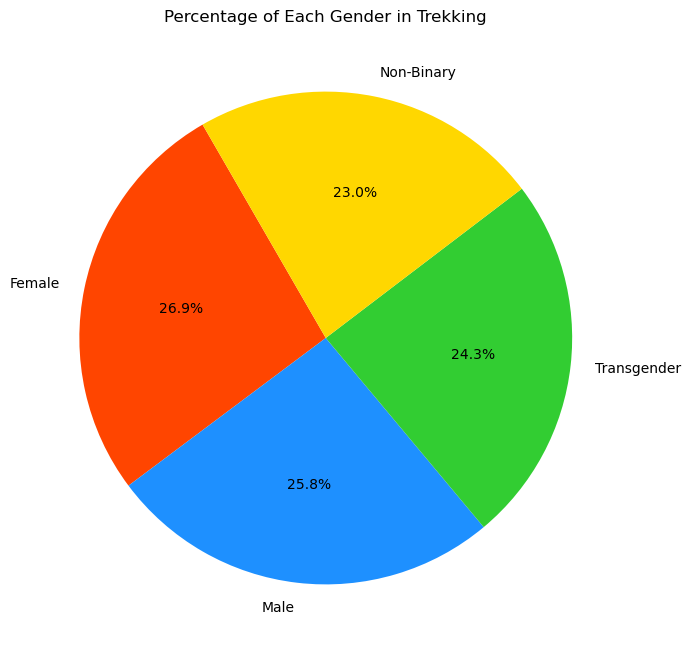

In [87]:
# Grouping data by gender and counting the occurrences
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=120, colors=['#FF4500', '#1E90FF', '#32CD32', '#FFD700'])
plt.title('Percentage of Each Gender in Trekking')
plt.show()

## V2 : Total trekkers from Nepal

In [88]:
# Filter data for trekkers from Nepal
nepal_trekkers = df[df['country'] == 'Nepal']

# Group by travel_date and count occurrences
nepal_trekkers_count = nepal_trekkers.groupby('travel_date').size().reset_index(name='total_trekkers')

# Display the counts
print(nepal_trekkers_count)

  travel_date  total_trekkers
0  2020-06-20               1
1  2022-06-29               1
2  2025-05-13               1


## V3 : Total trekkers from SAARC Country

In [89]:
# Define the list of SAARC countries
saarc_countries = ['Nepal', 'India', 'Bhutan', 'Bangladesh', 'Sri Lanka', 'Maldives', 'Pakistan', 'Afghanistan']

# Filter data for trekkers from SAARC countries
saarc_trekkers = df[df['country'].isin(saarc_countries)]

# Select columns for country, trek destination, and age
saarc_trekkers_details = saarc_trekkers[['country', 'trek', 'age']]

print(saarc_trekkers_details)

# Calculate the total number of trekkers from SAARC countries
total_trekkers = saarc_trekkers_details.shape[0]
print("\nTotal number of trekkers from SAARC countries:", total_trekkers)

         country                               trek  age
1    Afghanistan       Everest Base Camp Short Trek   31
13    Bangladesh           Annapurna Base Camp Trek   31
17        Bhutan                   Mardi Himal Trek   28
34     Sri Lanka               Tamang Heritage Trek   28
81         India           Annapurna Base Camp Trek   25
111     Maldives           Annapurna Base Camp Trek   28
126        Nepal           Everest High Passes Trek   32
137     Pakistan        Khopra Ridge Community Trek   29
203  Afghanistan                   Tsum Valley Trek   28
215   Bangladesh               Langtang Valley Trek   33
219       Bhutan  Nepal Hiking And Culture TourTrek   31
236    Sri Lanka     Annapurna Base Camp Short Trek   26
284        India       Tsum Valley And Manaslu Trek   28
314     Maldives                   Mardi Himal Trek   26
329        Nepal           Langtang Gosaikunda Trek   28
340     Pakistan                 Upper Mustang Trek   27
382        Nepal               

### V3.1: count of trekkers from each SAARC country,

In [90]:
# Group by country and count the number of trekkers
trekkers_by_country = saarc_trekkers.groupby('country').size().reset_index(name='total_trekkers')

# Display the grouped data
print(trekkers_by_country)

       country  total_trekkers
0  Afghanistan               2
1   Bangladesh               2
2       Bhutan               2
3        India               2
4     Maldives               2
5        Nepal               3
6     Pakistan               2
7    Sri Lanka               2


## V4: ANNUAL INCOME BY EMPLOYMENT TYPE

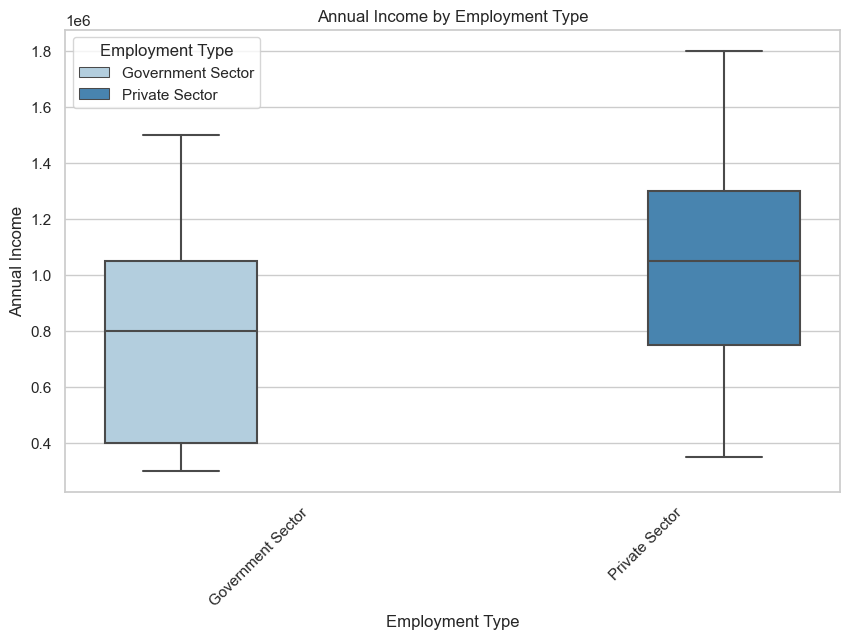

In [91]:
sns.set(style="whitegrid")

# Box Plot of 'annual_income' by 'employment_type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='annual_income', hue='employment_type', palette="Blues")
plt.title('Annual Income by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')  # Adding a legend with a title
plt.show()

## V5: ANNUAL INCOME BY GENDER

In [92]:
# Group by gender and calculate the mean, median, and count of annual income
income_stats = df.groupby('gender')['annual_income'].agg(['mean', 'median', 'count']).reset_index()

print(income_stats)

        gender           mean     median  count
0       Female  975242.718447  1050000.0    103
1         Male  913636.363636   900000.0     99
2   Non-Binary  957954.545455   900000.0     88
3  Transgender  950000.000000   900000.0     93


### V5.1: VISUALIZING THE AGGREGATED DATA FOR MORE CLEAR ANALYSIS

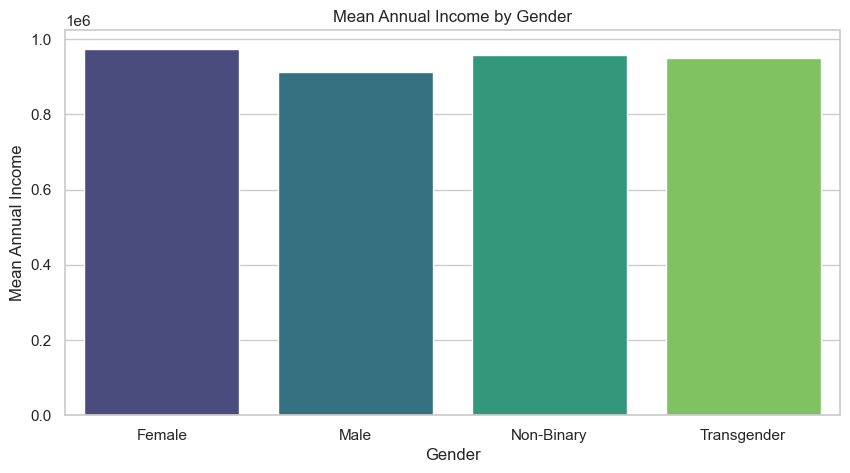

In [93]:
plt.figure(figsize=(10, 5))
sns.barplot(data=income_stats, x='gender', y='mean', palette='viridis')
plt.title('Mean Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income')
plt.show()

## V6: ANNUAL INCOME BY GENDER IN NEPAL

In [94]:
# Filter the DataFrame 
nepal_trekkers = df[df['country'] == 'Nepal']

# Group by gender and calculate mean, median, and count of annual income
income_stats_nepal = nepal_trekkers.groupby('gender')['annual_income'].agg(['mean', 'median', 'count']).reset_index()

print(income_stats_nepal)

   gender       mean     median  count
0  Female  1100000.0  1100000.0      2
1    Male  1100000.0  1100000.0      1


 ## V7: Box Plot for cost by trip_grade

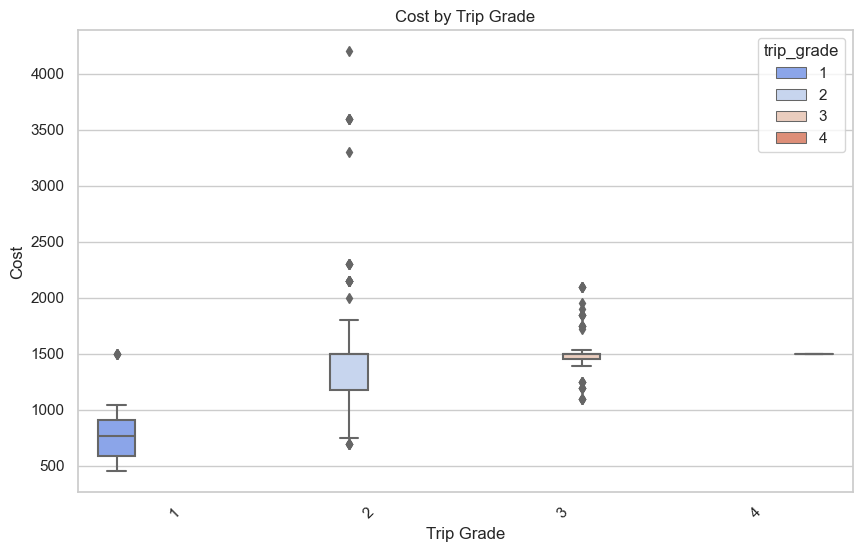

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='trip_grade', y='cost', hue='trip_grade', palette="coolwarm")
plt.title('Cost by Trip Grade')
plt.xlabel('Trip Grade')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()

## V8: Grouping by 'trip_grade' and 'chronic_diseases' to aggregate total customers, average age, and average cost

In [96]:
# Grouping by 'trip_grade' and 'chronic_diseases' to aggregate total customers, average age, and average cost
trip_aggregated_health = df.groupby(['trip_grade', 'chronic_diseases']).agg(
    total_customers=('family_members', 'count'),
    avg_age=('age', 'mean'),
    avg_cost=('cost', 'mean')
).reset_index()

# Sorting by total customers to see where chronic diseases were most common
top_health_trips = trip_aggregated_health.sort_values(by='total_customers', ascending=False)
print(top_health_trips.head())

   trip_grade  chronic_diseases  total_customers    avg_age     avg_cost
2           2                 0              141  29.723404  1424.652482
4           3                 0               96  29.729167  1501.312500
3           2                 1               54  30.185185  1585.444444
5           3                 1               32  29.156250  1528.875000
0           1                 0               28  29.107143   829.857143


## V9: Counting the participants and the average costs grouping by trek name and trip grade

In [97]:
# Group by 'trek_name' and 'trip_grade', counting participants and averaging costs
total_participants_cost = df.groupby(['trek', 'trip_grade']).agg(
    total_participants=('trek', 'size'),  # Count of participants
    average_cost=('cost', 'mean')  # Average cost for the trek
).reset_index()

# Sort the results in descending order by total_participants
total_participants_cost_sorted = total_participants_cost.sort_values(by='total_participants', ascending=False)

# Display the result
print(total_participants_cost_sorted)

                                  trek  trip_grade  total_participants  \
21              Everest Base Camp Trek           3                  21   
2             Annapurna Base Camp Trek           2                  15   
63                  Upper Mustang Trek           2                  15   
48                    Mardi Himal Trek           2                  15   
6               Annapurna Circuit Trek           3                  15   
..                                 ...         ...                 ...   
22             Everest Chola Pass Trek           3                   1   
54                  Short Everest Trek           2                   1   
42  Luxury Everest Base Camp Heli Trek           2                   1   
28               Everest Panorama Trek           2                   1   
31       Gokyo Lake Renjo La Pass Trek           2                   1   

    average_cost  
21   1573.571429  
2    1226.333333  
63   1983.000000  
48   1066.333333  
6    1366.000000

## V10: COST DISTRIBUTIONS BY GENDERS, AGE RANGE

In [98]:
df['age'].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27], dtype=int64)

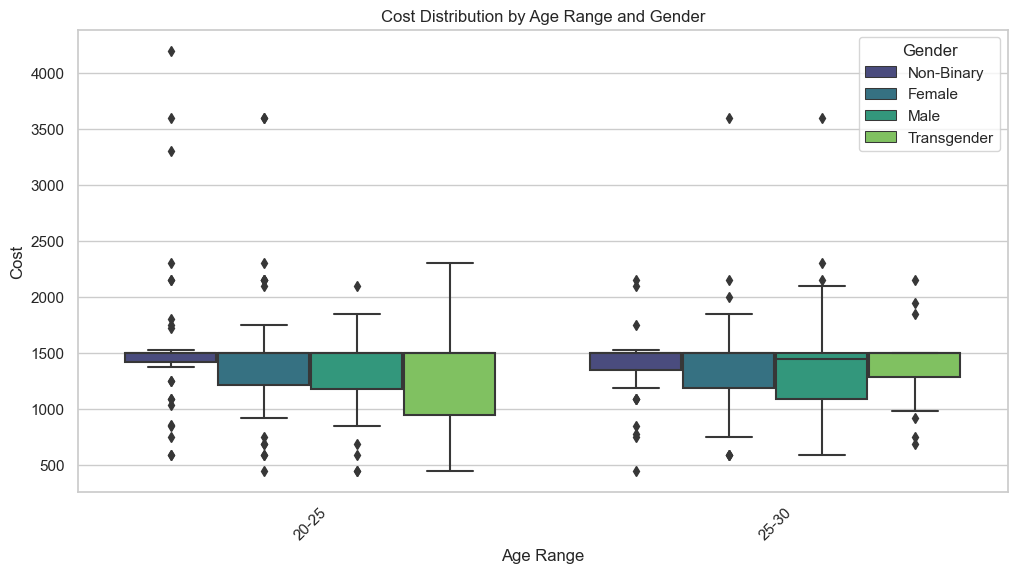

In [99]:
bins = [ 20, 30, 100]  # Adjust the bins as needed
labels = [ '20-25', '25-30']

# Create the Age Range column
df['Age Range'] = pd.cut(df['age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age Range', y='cost', hue='gender', palette="viridis")
plt.title('Cost Distribution by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

## V 11: COST DISTRIBUTION BY INCOME RANGE

In [100]:
df['annual_income'].unique()

array([ 400000, 1250000,  500000,  700000, 1150000, 1300000, 1350000,
       1450000,  800000, 1400000,  850000, 1500000, 1050000,  350000,
       1100000,  600000,  900000,  550000,  300000,  750000, 1200000,
       1000000,  950000, 1700000, 1750000,  650000,  450000, 1650000,
       1800000, 1550000], dtype=int64)

In [101]:
df.columns

Index(['trek', 'cost', 'time', 'trip_grade', 'max_altitude',
       'accomodation_type', 'Best Travel Time', 'travel_date', 'gender', 'age',
       'employment_type', 'isGraduated', 'annual_income', 'family_members',
       'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad',
       'TravelInsurance', 'year', 'country', 'Cost_Capped', 'Altitude_Group',
       'Altitude_High', 'Altitude_Low', 'Altitude_Medium',
       'best_travel_time_1', 'best_travel_time_2', 'travel_month',
       'travel_day', 'travel_weekday', 'gender_Female', 'gender_Male',
       'gender_Non-Binary', 'gender_Transgender', 'Jan_encoded', 'Feb_encoded',
       'Mar_encoded', 'Apr_encoded', 'May_encoded', 'Jun_encoded',
       'Jul_encoded', 'Aug_encoded', 'Sep_encoded', 'Oct_encoded',
       'Nov_encoded', 'Dec_encoded', 'Age Range'],
      dtype='object')

In [102]:
df['annual_income'].unique()

array([ 400000, 1250000,  500000,  700000, 1150000, 1300000, 1350000,
       1450000,  800000, 1400000,  850000, 1500000, 1050000,  350000,
       1100000,  600000,  900000,  550000,  300000,  750000, 1200000,
       1000000,  950000, 1700000, 1750000,  650000,  450000, 1650000,
       1800000, 1550000], dtype=int64)

## V 12: Total Cost Distribution by Age and Income Range

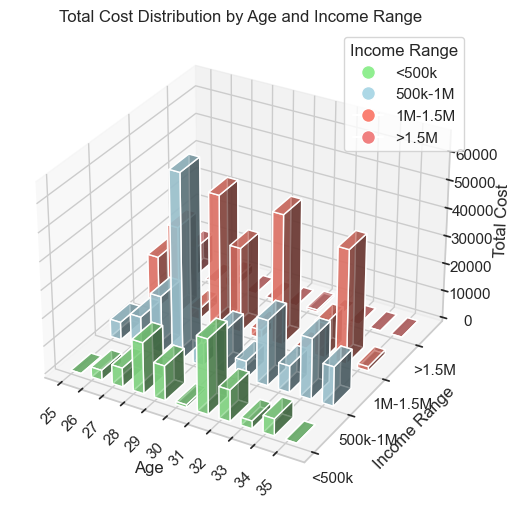

In [103]:
bins = [0, 500000, 1000000, 1500000, 2000000]  # Define ranges based on your values
labels = ['<500k', '500k-1M', '1M-1.5M', '>1.5M']
df['Income Range'] = pd.cut(df['annual_income'], bins=bins, labels=labels)

# Group by Age and Income Range and sum the cost
age_income_group = df.groupby(['age', 'Income Range'])['cost'].sum().reset_index()

# Create a pivot table for easier plotting
pivot_table = age_income_group.pivot(index='age', columns='Income Range', values='cost').fillna(0)

# Prepare data for the 3D plot
x = pivot_table.index.values  # Unique ages
y = np.arange(len(pivot_table.columns))  # Income range indices
z = np.zeros_like(x)  # Base height (z = 0)

# Bar width and depth
dx = 0.5  # Width of the bars
dy = 0.5  # Depth of the bars

# Create a 3D bar chart
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Colors for each income range
colors = ['lightgreen', 'lightblue', 'salmon', 'lightcoral']  # Adjust based on the number of income ranges

# Loop through each income range to create bars
for i in range(len(pivot_table.columns)):
    ax.bar3d(x, np.full_like(x, i), z, dx, dy, pivot_table.iloc[:, i], 
             color=colors[i % len(colors)], alpha=0.7)

# Custom legend with income range labels
legend_labels = pivot_table.columns.tolist()
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10)
                 for i in range(len(legend_labels))]
ax.legend(custom_legend, legend_labels, title='Income Range')

# Setting the labels and title
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
ax.set_yticks(np.arange(len(pivot_table.columns)))
ax.set_yticklabels(pivot_table.columns)
ax.set_xlabel('Age')
ax.set_ylabel('Income Range')
ax.set_zlabel('Total Cost')
ax.set_title('Total Cost Distribution by Age and Income Range')

plt.tight_layout()
plt.show()


## V13: Trip Grade Distribution by age range

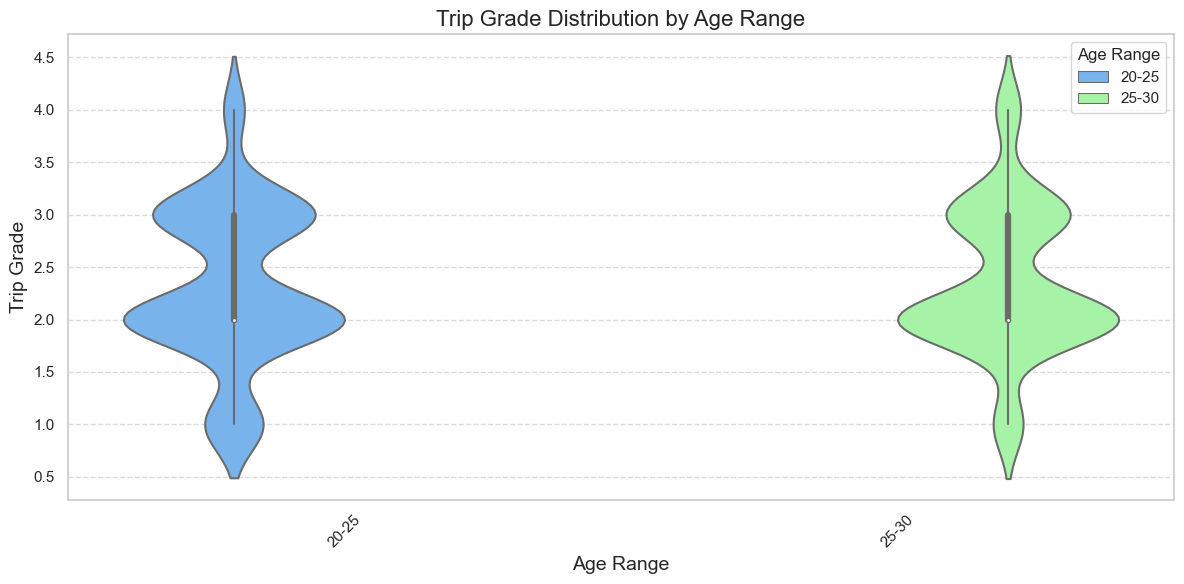

In [104]:
# Define a custom color palette that matches your age range labels
custom_palette = {
    '0-20': '#FF9999',    # Light red
    '20-25': '#66B3FF',   # Light blue
    '25-30': '#99FF99',   # Light green
    '30-35': '#FFCC99',   # Light orange
}

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Age Range', y='trip_grade', hue='Age Range', 
                palette=custom_palette, inner='box', linewidth=1.5, dodge=True)
plt.title('Trip Grade Distribution by Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Trip Grade', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## V14: CHRONIC DISEASE BY AGE

In [105]:
# Filtering dataset for individuals with chronic diseases
chronic_disease_data = df[df['chronic_diseases'] == 1]

chronic_by_age_range = chronic_disease_data.groupby('Age Range').size().reset_index(name='count')
print(chronic_by_age_range)

  Age Range  count
0     20-25     58
1     25-30     45


## V15: Age distribution for individuals with chronic diseases

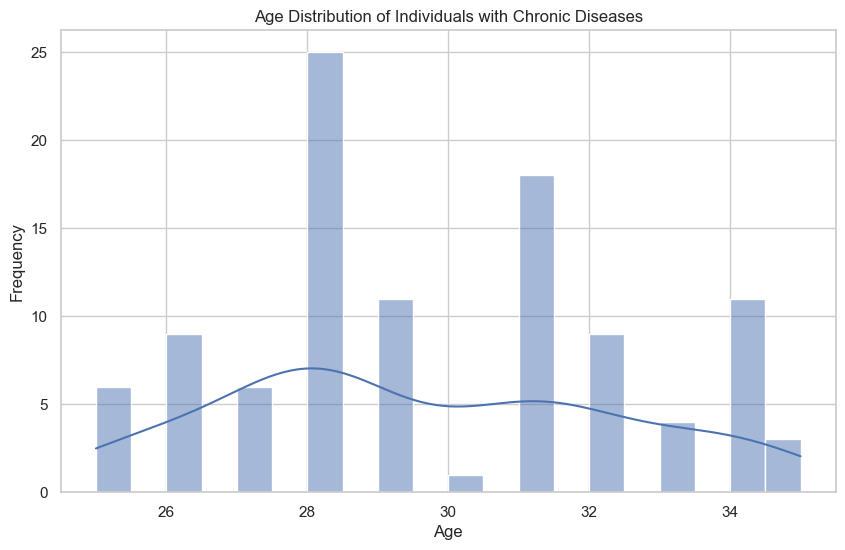

In [106]:
# Plotting the age distribution for individuals with chronic diseases
plt.figure(figsize=(10, 6))
sns.histplot(chronic_disease_data['age'], bins=20, kde=True)
plt.title("Age Distribution of Individuals with Chronic Diseases")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## V16: Time Series Plot for Monthly Travel Trends

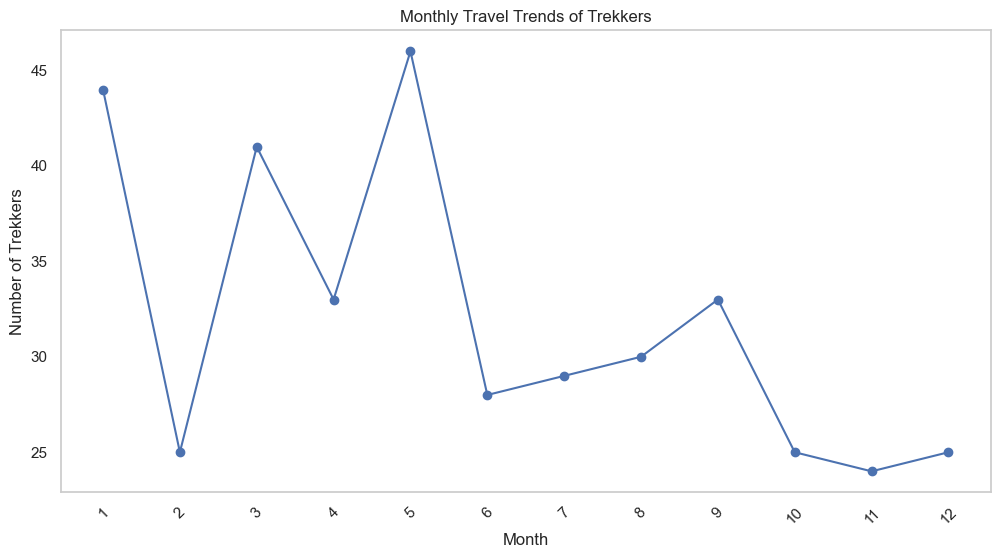

In [107]:
# Grouping by month and count the number of trekkers
monthly_travel_trends = df.groupby('travel_month').size().reset_index(name='total_trekkers')

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_travel_trends['travel_month'].astype(str), monthly_travel_trends['total_trekkers'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Travel Trends of Trekkers")
plt.xlabel("Month")
plt.ylabel("Number of Trekkers")
plt.grid()
plt.show()

## V 17: PREFERENCE OF TREKKERS ON TRIP GRADE BY GENDER

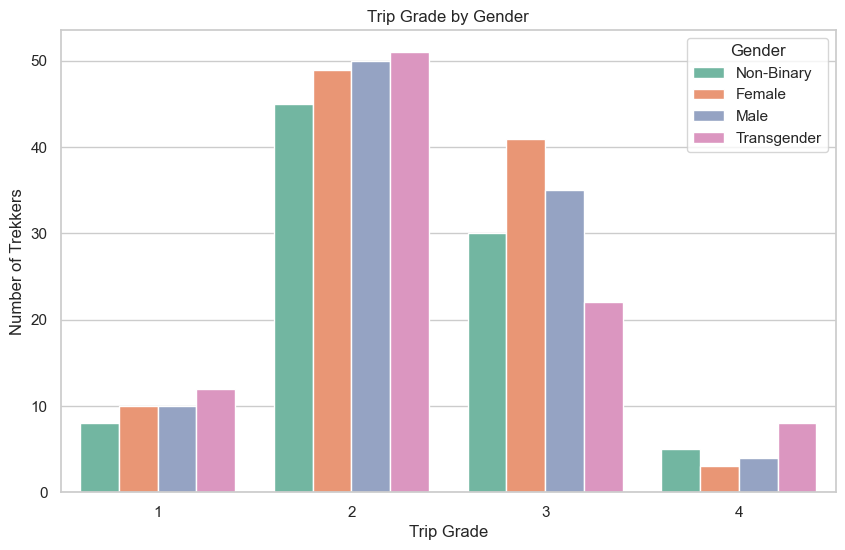

In [108]:
# Plotting trip grade by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_grade', hue='gender', palette="Set2")
plt.title("Trip Grade by Gender")
plt.xlabel("Trip Grade")
plt.ylabel("Number of Trekkers")
plt.legend(title="Gender")
plt.show()

## V18: Frequent and non-frequent flyers and Travel Insurance

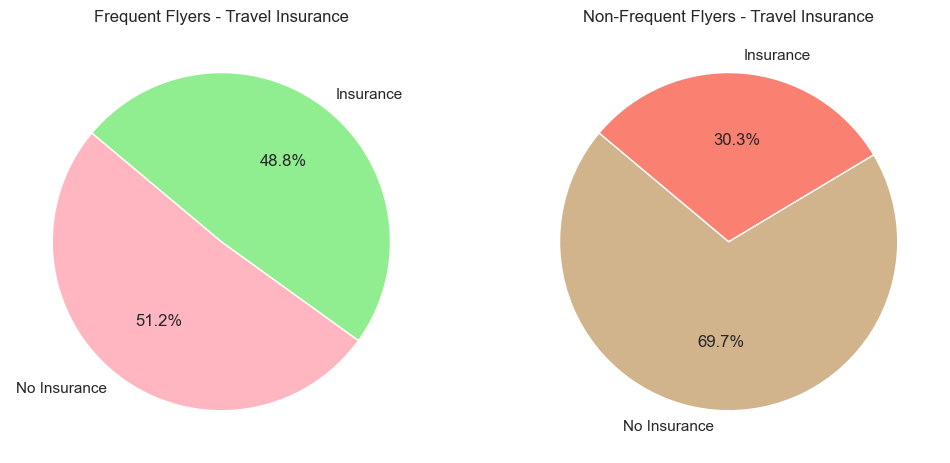

In [109]:
# Creating separate dataframes for frequent flyers and non-frequent flyers
flyer_yes = df[df['frequent_flyer'] == 1]['TravelInsurance'].value_counts()
flyer_no = df[df['frequent_flyer'] == 0]['TravelInsurance'].value_counts()

# Plotting pie charts for both groups
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(flyer_yes, labels=['No Insurance', 'Insurance'], autopct='%1.1f%%', startangle=140, colors=['lightpink', 'lightgreen'])
axs[0].set_title("Frequent Flyers - Travel Insurance")

axs[1].pie(flyer_no, labels=['No Insurance', 'Insurance'], autopct='%1.1f%%', startangle=140, colors=['tan', 'salmon'])
axs[1].set_title("Non-Frequent Flyers - Travel Insurance")

plt.show()


## V19: Popular Travel Weekday

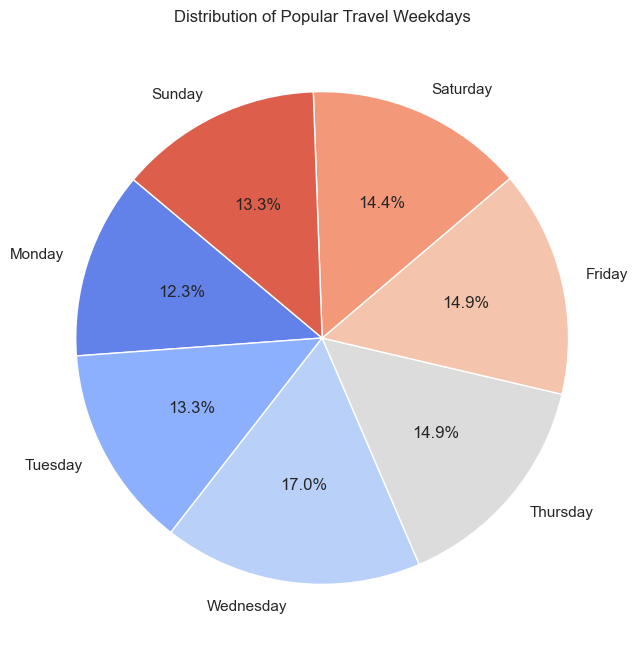

In [110]:
# Counting the occurrences of each weekday
weekday_counts = df['travel_weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8, 8))
plt.pie(weekday_counts.values, labels=weekday_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(weekday_counts)))
plt.title("Distribution of Popular Travel Weekdays")
plt.show()


## V20: Trekkers with Chronic Diseases and Frequent Flyer Status

<Figure size 1000x600 with 0 Axes>

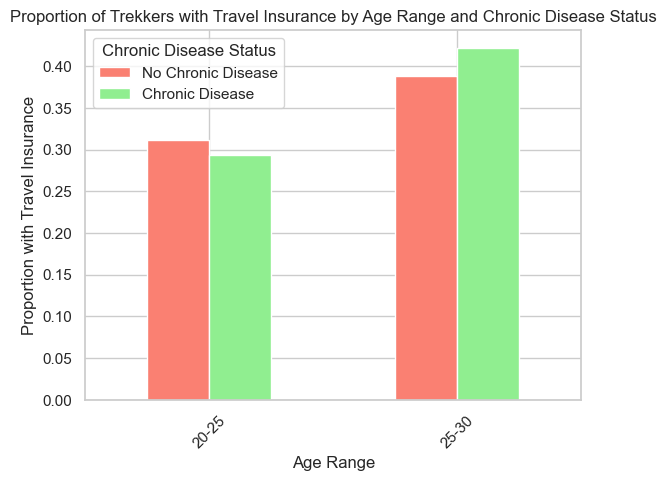

In [111]:
# Group by Age Range and Chronic Disease Status, calculate proportion with insurance
insurance_chronic_age_clustered = df.groupby(['Age Range', 'chronic_diseases'])['TravelInsurance'].mean().unstack()

# Plot
plt.figure(figsize=(10, 6))
insurance_chronic_age_clustered.plot(kind='bar', color=["salmon", "lightgreen"])
plt.title("Proportion of Trekkers with Travel Insurance by Age Range and Chronic Disease Status")
plt.xlabel("Age Range")
plt.ylabel("Proportion with Travel Insurance")
plt.legend(["No Chronic Disease", "Chronic Disease"], title="Chronic Disease Status")
plt.xticks(rotation=45)
plt.show()


## V21: AVERAGE COST OVER TRAVEL MONTHS

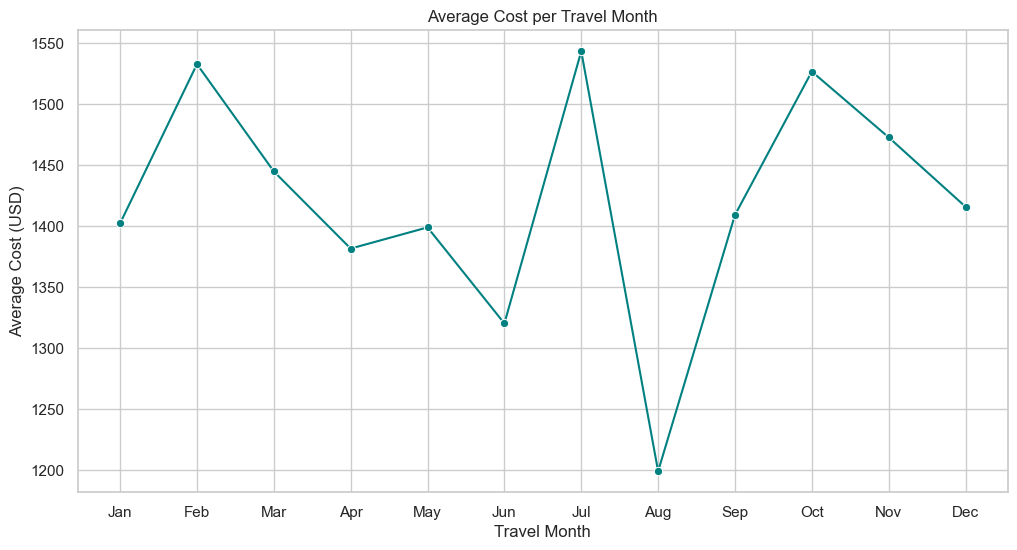

In [112]:
avg_cost_per_month = df.groupby('travel_month')['cost'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_cost_per_month.index, y=avg_cost_per_month.values, marker="o", color="teal")
plt.title("Average Cost per Travel Month")
plt.xlabel("Travel Month")
plt.ylabel("Average Cost (USD)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## V22: EVER TRAVELLED ABROAD BY FAMILY SIZE

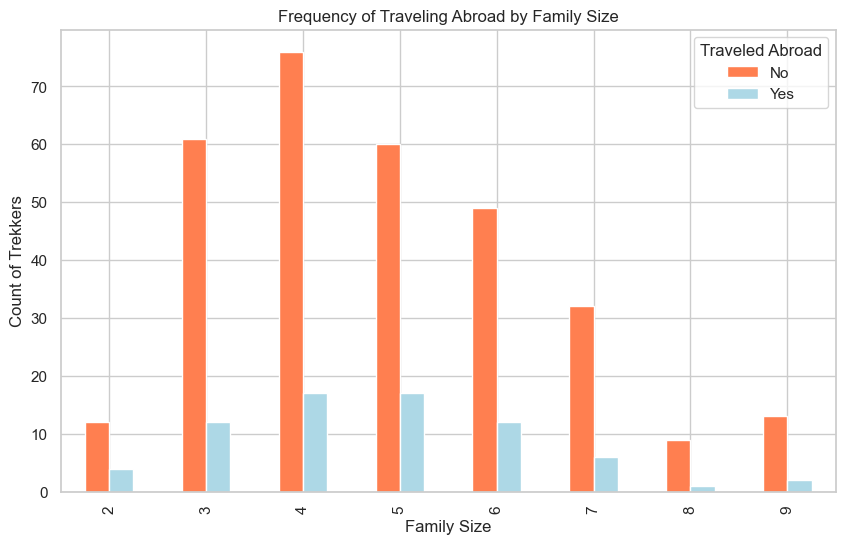

In [113]:
family_abroad = df.groupby(['family_members', 'ever_travelled_abroad']).size().unstack(fill_value=0)
family_abroad.plot(kind='bar', color=['coral', 'lightblue'], figsize=(10, 6))
plt.title('Frequency of Traveling Abroad by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count of Trekkers')
plt.legend(['No', 'Yes'], title='Traveled Abroad')
plt.show()

## V23: 5 MOST AND LEAST POPULAR TREKS WITH MOST PARTICIPANTS ALONG WITH THE INCOME STATUS

In [114]:
df['Income Range'].unique()

['<500k', '1M-1.5M', '500k-1M', '>1.5M']
Categories (4, object): ['<500k' < '500k-1M' < '1M-1.5M' < '>1.5M']

In [115]:
# Define the income status based on the income range
def income_status(income_range):
    if income_range == '<500k':
        return 'Low Income'
    elif income_range == '500k-1M':
        return 'Low Income'
    elif income_range == '1M-1.5M':
        return 'High Income'
    elif income_range == '>1.5M':
        return 'High Income'
    else:
        return 'Unknown'  # For safety, if there are unexpected values
        
# Apply the income status function to create a new column
df['income_status'] = df['Income Range'].apply(income_status)

# Count total participants by trek and income status
participant_counts = df.groupby(['trek', 'income_status']).size().reset_index(name='total_participants')

# Calculate total participants per trek
total_participants_per_trek = participant_counts.groupby('trek')['total_participants'].sum().reset_index()

# Merge to keep track of income status
merged_data = participant_counts.merge(total_participants_per_trek, on='trek', suffixes=('', '_total'))

# Get the top 5 and bottom 5 treks based on total participants
top_5_treks = merged_data.nlargest(5, 'total_participants_total')
bottom_5_treks = merged_data.nsmallest(5, 'total_participants_total')

# Combine the results
result = pd.concat([top_5_treks, bottom_5_treks])

# Display the resulting DataFrame
print(result[['trek', 'income_status', 'total_participants']])

                                   trek income_status  total_participants
35               Everest Base Camp Trek   High Income                  11
36               Everest Base Camp Trek    Low Income                  17
10               Annapurna Circuit Trek   High Income                   8
11               Annapurna Circuit Trek    Low Income                  12
67                 Langtang Valley Trek   High Income                  13
28  Everest Base Camp Heli Shuttle Trek    Low Income                   1
37              Everest Chola Pass Trek   High Income                   1
52        Gokyo Lake Renjo La Pass Trek   High Income                   1
71   Luxury Everest Base Camp Heli Trek   High Income                   1
90                   Short Everest Trek   High Income                   1


## V24: IMPACT ON TRAVEL INSURANCE BY FAMILY SIZE

In [116]:
# Count the total number of Yes (1) and No (0) by family size
insurance_counts = df.groupby('family_members')['TravelInsurance'].value_counts().unstack(fill_value=0)

# Display the counts
print(insurance_counts)

TravelInsurance   0   1
family_members         
2                 8   8
3                47  26
4                69  24
5                53  24
6                34  27
7                23  15
8                 8   2
9                 9   6


## V25: CHRONIC DISEASES AND TRAVEL INSURANCE

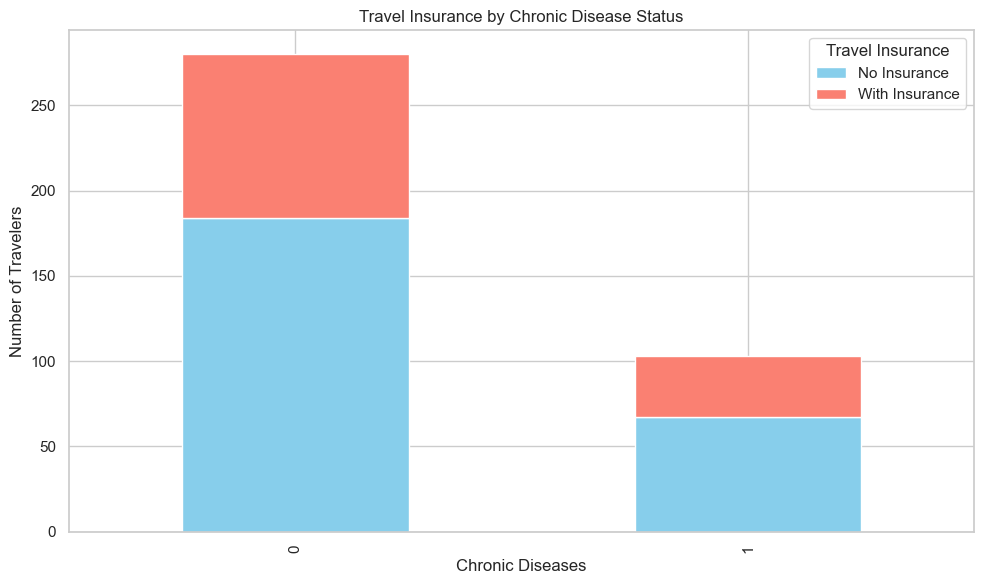

In [117]:
# Create a crosstab to get the count of people with/without travel insurance per chronic disease status
chronic_insurance_counts = pd.crosstab(df['chronic_diseases'], df['TravelInsurance'])

# Plot the stacked bar chart
chronic_insurance_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Set labels and title
plt.xlabel('Chronic Diseases')
plt.ylabel('Number of Travelers')
plt.title('Travel Insurance by Chronic Disease Status')
plt.legend(title='Travel Insurance', labels=['No Insurance', 'With Insurance'])

# Show the plot
plt.tight_layout()
plt.show()

## V26: ANALYZING FREQUENT FLYERS BY EMPLOYMENT TYPE

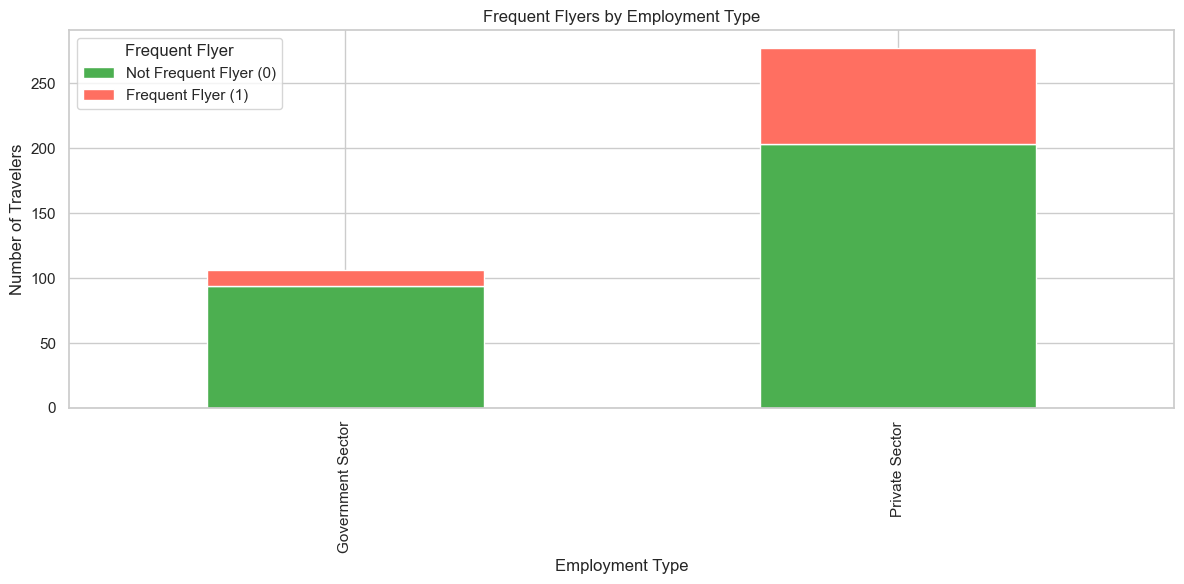

In [118]:
# Create a crosstab to get counts of frequent flyers (0 and 1) by employment type
employment_flyer_counts = pd.crosstab(df['employment_type'], df['frequent_flyer'])

# Plot the stacked bar chart
employment_flyer_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#4CAF50', '#FF6F61'])

# Set labels and title
plt.xlabel('Employment Type')
plt.ylabel('Number of Travelers')
plt.title('Frequent Flyers by Employment Type')

# Add a legend
plt.legend(title='Frequent Flyer', labels=['Not Frequent Flyer (0)', 'Frequent Flyer (1)'])

# Show the plot
plt.tight_layout()
plt.show()

## V27: TREK POPULARITY BY AGE GROUP

In [119]:
# Assuming 'age' column exists and age ranges are defined
df['Age Range'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Group by trek and Age Range to count participants
trek_age_group_counts = df.groupby(['trek', 'Age Range']).size().reset_index(name='total_participants')

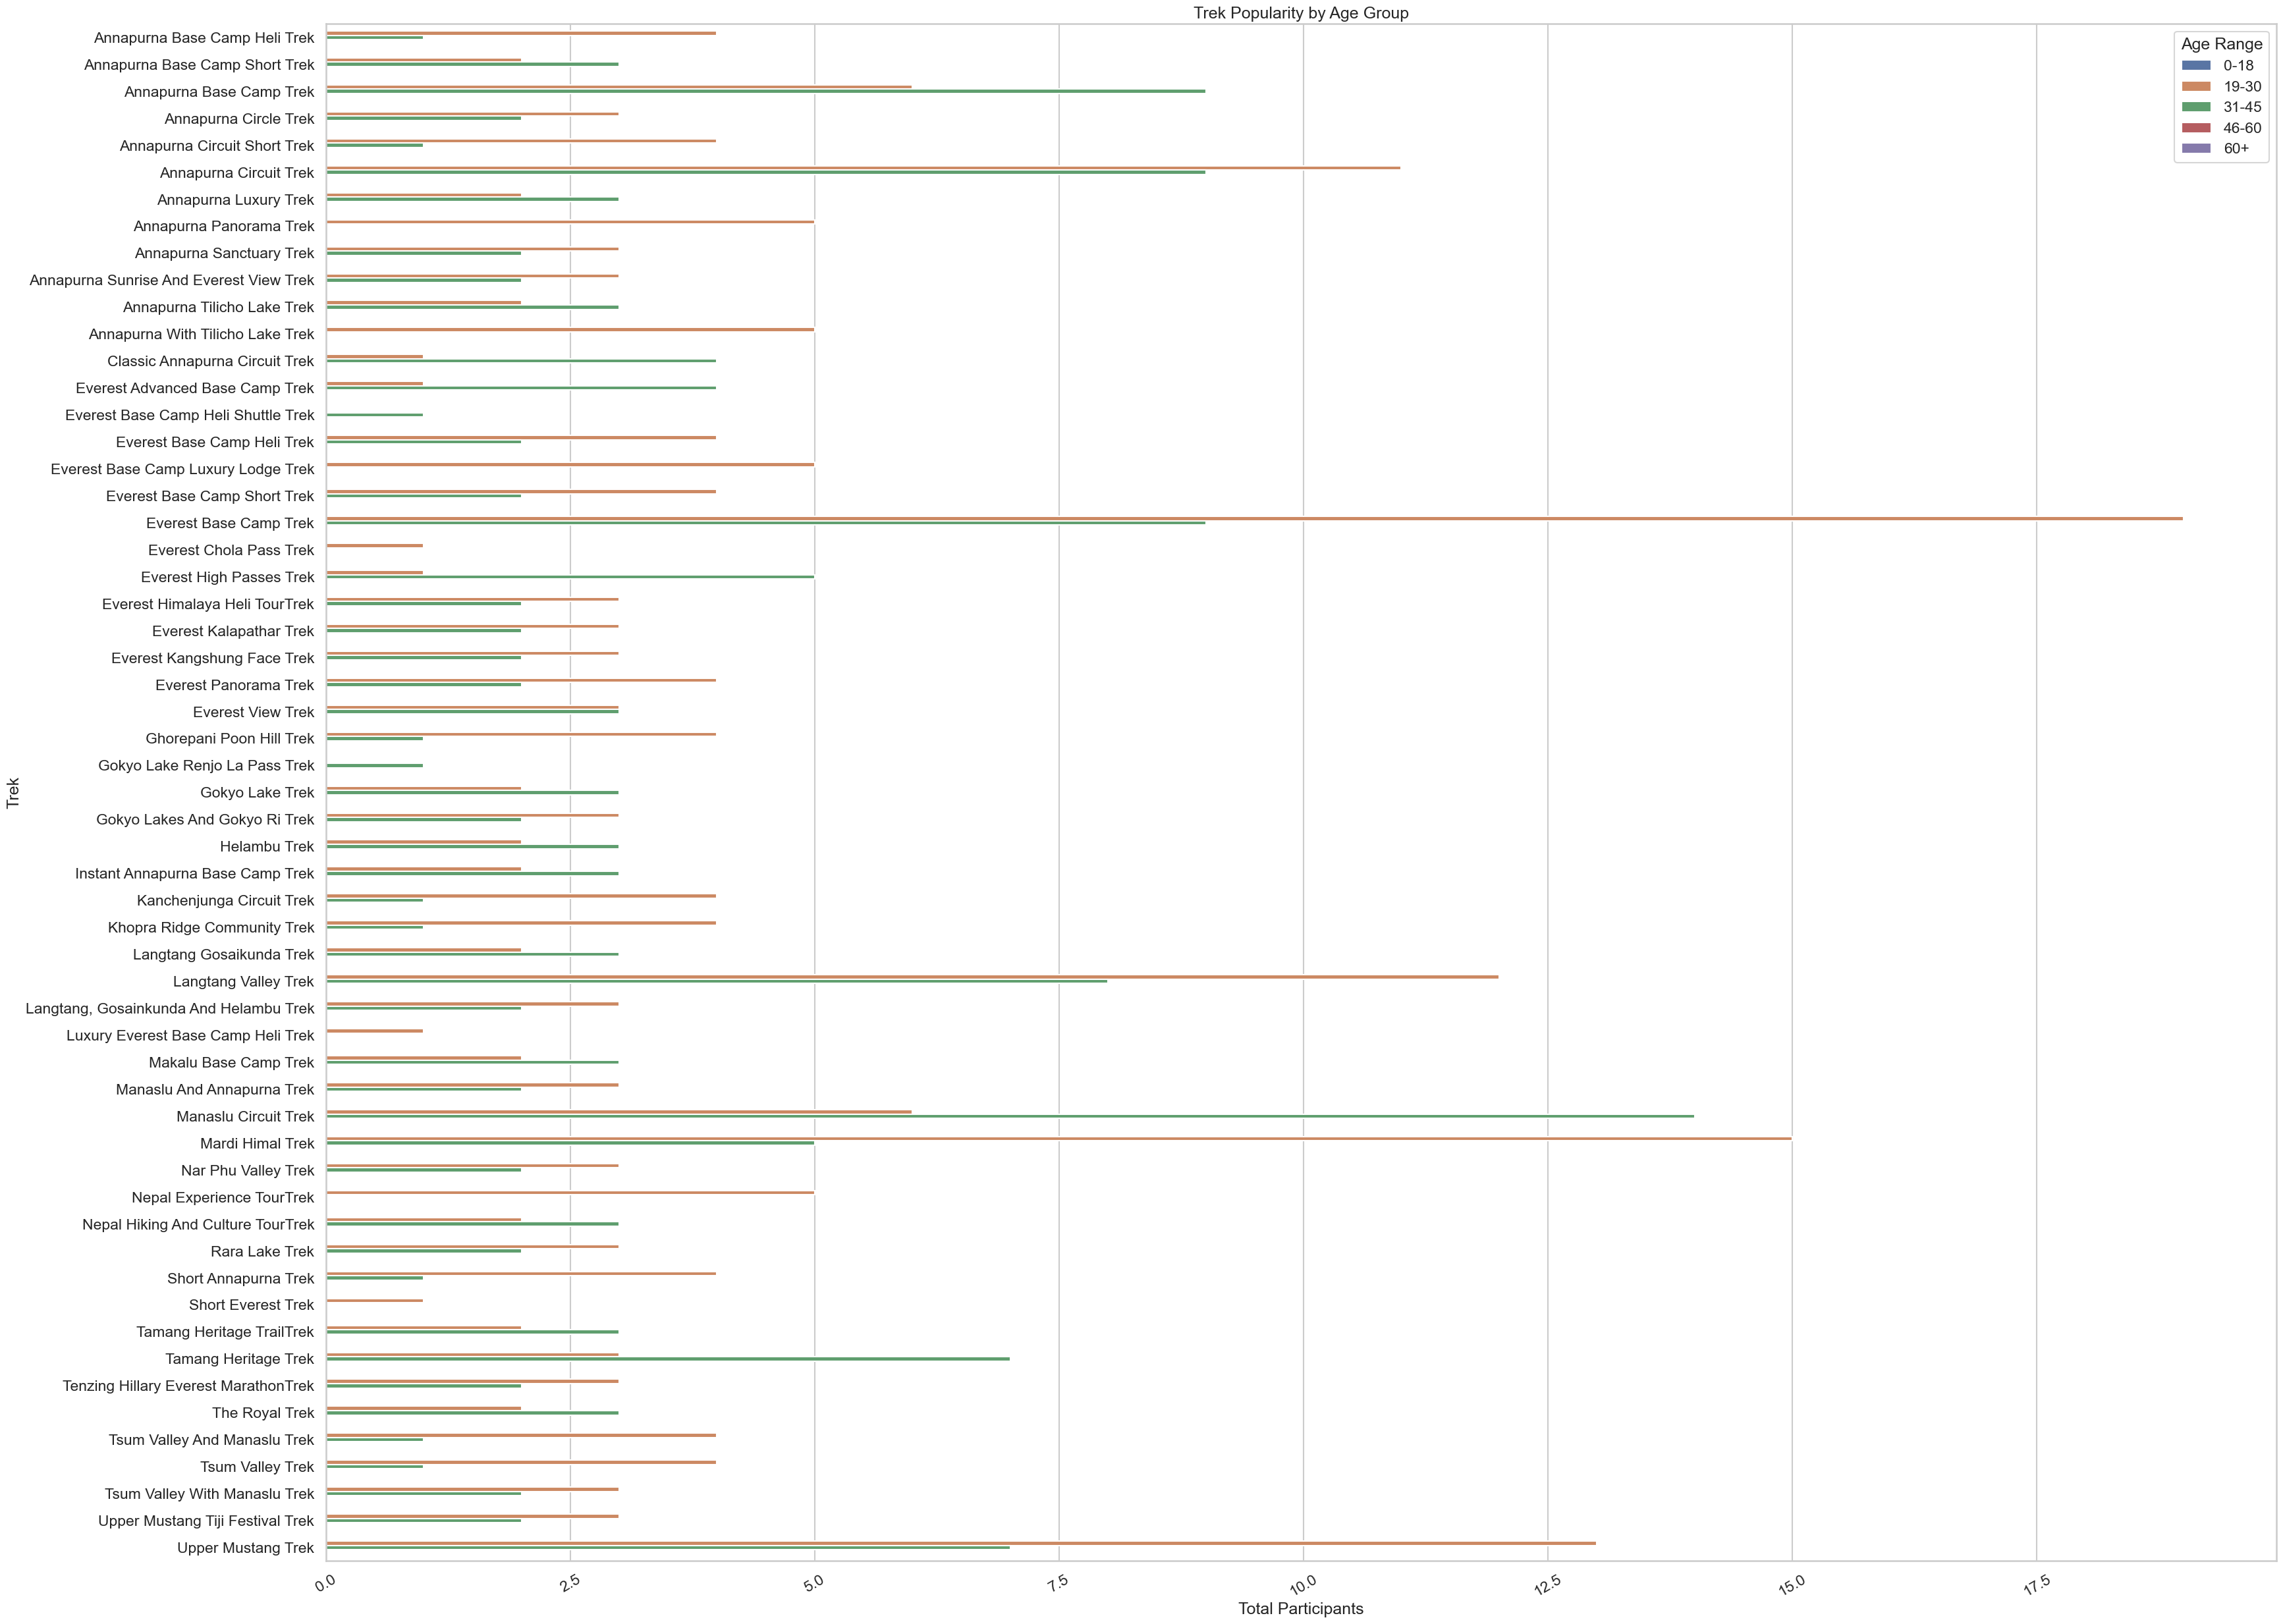

In [120]:
# Set font sizes globally
plt.rcParams['axes.labelsize'] = 16  # Font size for x and y labels
plt.rcParams['axes.titlesize'] = 22  # Font size for the title
plt.rcParams['xtick.labelsize'] = 12  # Font size for x-tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size for y-tick labels
plt.rcParams['legend.fontsize'] = 12  # Font size for legend text
plt.rcParams['legend.title_fontsize'] = 14  # Font size for legend title

# Set plot context for larger elements
sns.set_context("talk")

# Set figure size
plt.figure(figsize=(35, 25))

# Create the bar plot
bar_plot = sns.barplot(data=trek_age_group_counts, y='trek', x='total_participants', hue='Age Range')

# Add title and labels
plt.xlabel('Total Participants')
plt.ylabel('Trek')
plt.title('Trek Popularity by Age Group')

# Rotate x-tick labels
plt.xticks(rotation=30)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [121]:
print(list(df))

['trek', 'cost', 'time', 'trip_grade', 'max_altitude', 'accomodation_type', 'Best Travel Time', 'travel_date', 'gender', 'age', 'employment_type', 'isGraduated', 'annual_income', 'family_members', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad', 'TravelInsurance', 'year', 'country', 'Cost_Capped', 'Altitude_Group', 'Altitude_High', 'Altitude_Low', 'Altitude_Medium', 'best_travel_time_1', 'best_travel_time_2', 'travel_month', 'travel_day', 'travel_weekday', 'gender_Female', 'gender_Male', 'gender_Non-Binary', 'gender_Transgender', 'Jan_encoded', 'Feb_encoded', 'Mar_encoded', 'Apr_encoded', 'May_encoded', 'Jun_encoded', 'Jul_encoded', 'Aug_encoded', 'Sep_encoded', 'Oct_encoded', 'Nov_encoded', 'Dec_encoded', 'Age Range', 'Income Range', 'income_status']


# Model Training and Evaluation

In [122]:
print(list(df))

['trek', 'cost', 'time', 'trip_grade', 'max_altitude', 'accomodation_type', 'Best Travel Time', 'travel_date', 'gender', 'age', 'employment_type', 'isGraduated', 'annual_income', 'family_members', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad', 'TravelInsurance', 'year', 'country', 'Cost_Capped', 'Altitude_Group', 'Altitude_High', 'Altitude_Low', 'Altitude_Medium', 'best_travel_time_1', 'best_travel_time_2', 'travel_month', 'travel_day', 'travel_weekday', 'gender_Female', 'gender_Male', 'gender_Non-Binary', 'gender_Transgender', 'Jan_encoded', 'Feb_encoded', 'Mar_encoded', 'Apr_encoded', 'May_encoded', 'Jun_encoded', 'Jul_encoded', 'Aug_encoded', 'Sep_encoded', 'Oct_encoded', 'Nov_encoded', 'Dec_encoded', 'Age Range', 'Income Range', 'income_status']


In [123]:
final_df = df.drop(['accomodation_type', 'Best Travel Time', 'gender'], axis=1)

In [124]:
final_df.to_csv('Dataset_ModelTraining.csv', index=False)

### Observing Statistical Values

In [125]:
# Summary statistics
print(df[['cost', 'annual_income', 'max_altitude', 'time']].describe())

              cost  annual_income  max_altitude        time
count   383.000000   3.830000e+02    383.000000  383.000000
mean   1415.966057   9.492167e+05   4640.156658   14.563969
std     466.104983   3.720953e+05   1022.513611    4.542465
min     450.000000   3.000000e+05   1550.000000    5.000000
25%    1190.000000   6.500000e+05   4130.000000   11.000000
50%    1499.000000   9.000000e+05   5050.000000   14.000000
75%    1499.000000   1.250000e+06   5416.000000   18.000000
max    4200.000000   1.800000e+06   6340.000000   27.000000


### Standardizing necessary columns

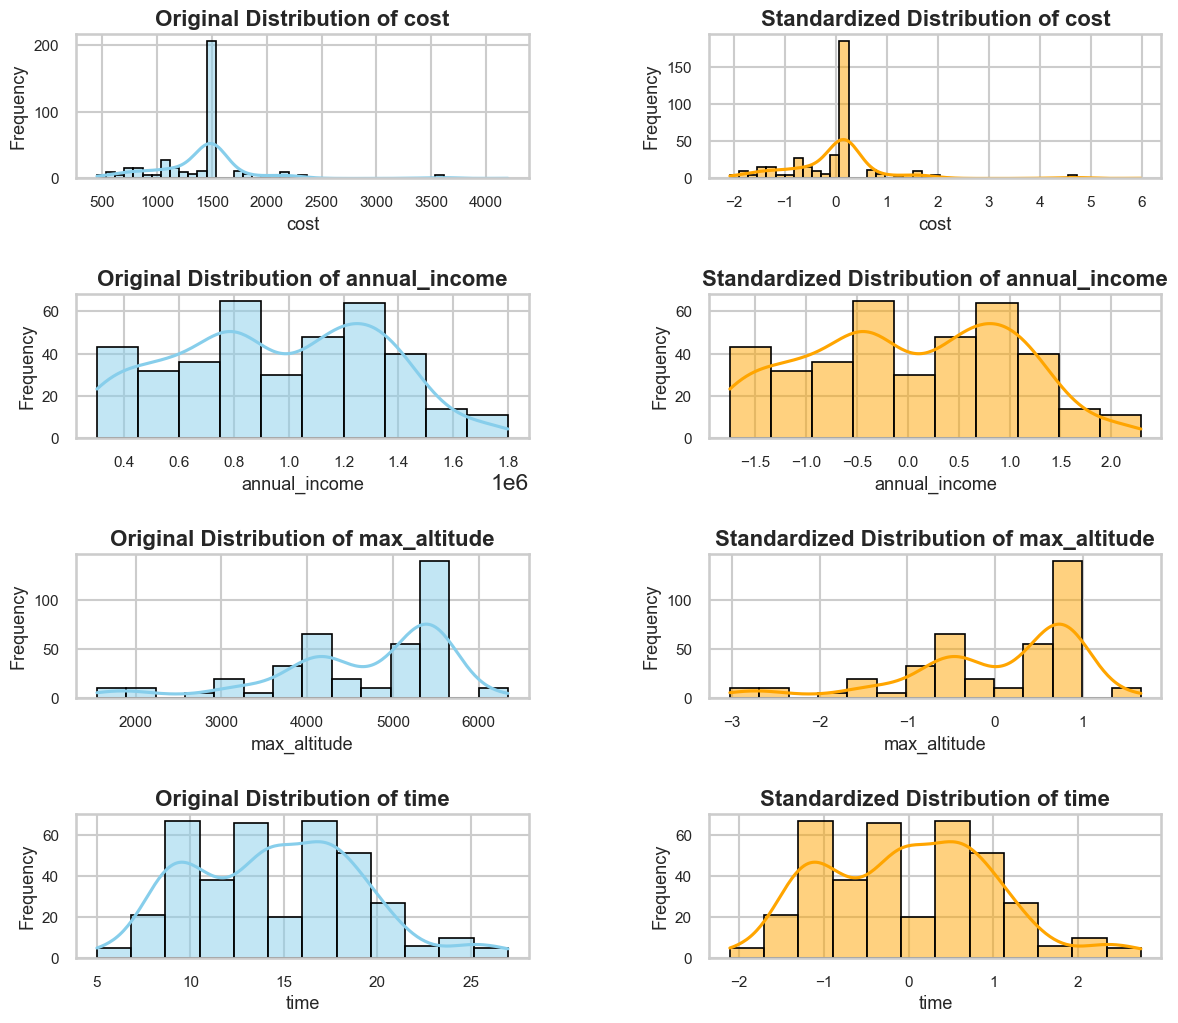

In [126]:
columns_to_standardize = ['cost', 'annual_income', 'max_altitude', 'time']

# Initializing the scaler
scaler = StandardScaler()

# Standardizing the selected columns
df_standardized = df.copy()
df_standardized[columns_to_standardize] = scaler.fit_transform(df_standardized[columns_to_standardize])

# Setting up the figure with subplots
fig, axes = plt.subplots(len(columns_to_standardize), 2, figsize=(14, 12), gridspec_kw={'wspace': 0.4, 'hspace': 0.8})

for i, col in enumerate(columns_to_standardize):
    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black', linewidth=1.2)
    axes[i, 0].set_title(f'Original Distribution of {col}', fontsize=16, fontweight='bold')
    axes[i, 0].set_xlabel(col, fontsize=13)
    axes[i, 0].set_ylabel('Frequency', fontsize=13)
    axes[i, 0].tick_params(axis='both', which='major', labelsize=11)
    
    # Standardized distribution
    sns.histplot(df_standardized[col], kde=True, ax=axes[i, 1], color='orange', edgecolor='black', linewidth=1.2)
    axes[i, 1].set_title(f'Standardized Distribution of {col}', fontsize=16, fontweight='bold')
    axes[i, 1].set_xlabel(col, fontsize=13)
    axes[i, 1].set_ylabel('Frequency', fontsize=13)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=11)

# Apply tight layout for better spacing between plots
plt.tight_layout(pad=4.0)
plt.show()

### Addressing Correlations

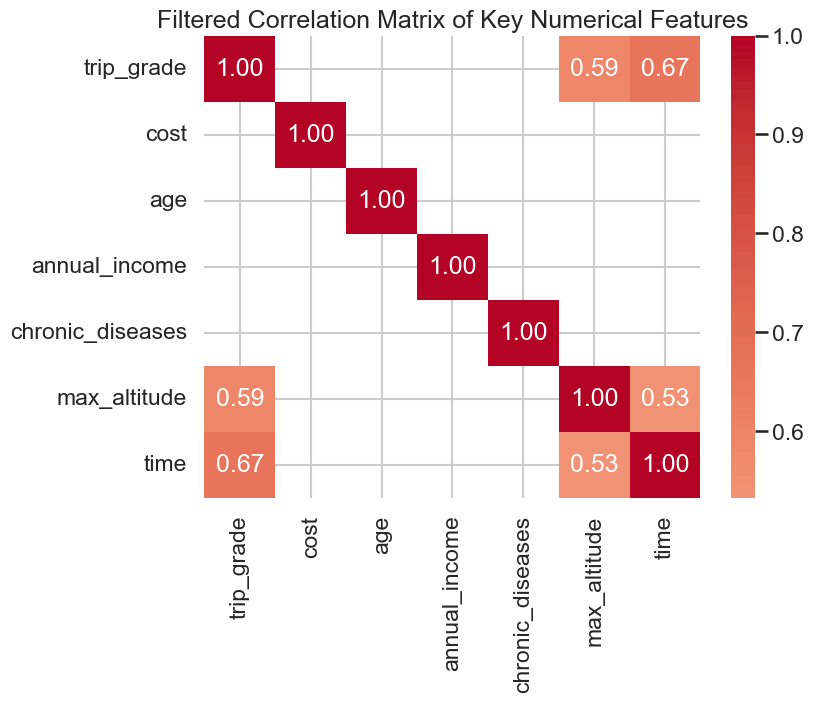

In [127]:
# Selecting only the numerical columns of interest
numerical_features = ['trip_grade', 'cost', 'age', 'annual_income', 'chronic_diseases', 'max_altitude', 'time']

# Calculating the correlation matrix for selected features
correlation_matrix = df[numerical_features].corr()

# Filter for correlations above a certain threshold
threshold = 0.3
strong_corr = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]

# Ploting the filtered correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Filtered Correlation Matrix of Key Numerical Features')
plt.show()


In [128]:
# Initialize list to track unique pairs
unique_pairs = []

# Extract unique pairs only
for feature in strong_corr.columns:
    for other_feature in strong_corr.index:
        if feature != other_feature and abs(strong_corr.loc[feature, other_feature]) > threshold:
            # Check if the reverse pair is not in the list to avoid duplicates
            if (other_feature, feature) not in unique_pairs:
                unique_pairs.append((feature, other_feature))

# Calculate required rows based on unique pairs
num_plots = len(unique_pairs)
rows_needed = (num_plots // 2) + (num_plots % 2)

# Initialize the subplot grid
fig = make_subplots(
    rows=rows_needed, 
    cols=2, 
    subplot_titles=[f"{feature} vs {other_feature} (corr={strong_corr.loc[feature, other_feature]:.2f})" for feature, other_feature in unique_pairs],
    horizontal_spacing=0.15,
    vertical_spacing=0.15
)

# Add scatter plots for each unique pair
for i, (feature, other_feature) in enumerate(unique_pairs):
    row = (i // 2) + 1
    col = (i % 2) + 1
    
    fig.add_trace(
        go.Scatter(
            x=df[feature], 
            y=df[other_feature], 
            mode='markers',
            marker=dict(size=7, color='teal', opacity=0.7),
            name=f"{feature} vs {other_feature}"
        ),
        row=row,
        col=col
    )

# Update layout for readability and visual appeal
fig.update_layout(
    title="Scatterplots of Highly Correlated Unique Feature Pairs",
    height=rows_needed * 400,  
    width=1000,
    showlegend=False,
    title_x=0.5,
    font=dict(size=12),
    template='plotly_white'
)

# Update axes properties for all subplots
fig.update_xaxes(showgrid=True, zeroline=False)
fig.update_yaxes(showgrid=True, zeroline=False)

# Show the interactive plot
fig.show()


### Implementing Anova F-test to find top features

In [129]:
categorical_features = ['gender_Female', 'gender_Male', 'Altitude_Group', 'employment_type']
numeric_features = ['age', 'annual_income', 'max_altitude', 'time', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad', 'travel_month']

# Using ColumnTransformer to apply OneHotEncoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Transform features with ColumnTransformer
X_processed = preprocessor.fit_transform(df[numeric_features + categorical_features])

# Target variable
y = pd.factorize(df['trip_grade'])[0]

# Apply SelectKBest to select top features
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_processed, y)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
all_feature_names = preprocessor.get_feature_names_out()
selected_features = all_feature_names[selected_feature_indices]

print("Top Features Selected by ANOVA F-Test:", selected_features)

Top Features Selected by ANOVA F-Test: ['num__max_altitude' 'num__time' 'num__frequent_flyer' 'num__travel_month'
 'cat__Altitude_Group_High' 'cat__Altitude_Group_Low'
 'cat__Altitude_Group_Medium' 'cat__employment_type_Government Sector']


### Implementing Logistic Regression

In [130]:
# Defining the target and selected features for modeling
X = X_selected
# y = pd.factorize(df['trip_grade'])[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a baseline Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model performance
print("Baseline Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Baseline Logistic Regression Accuracy: 0.5974025974025974

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.52      0.76      0.62        21
           2       0.50      0.11      0.18         9
           3       0.00      0.00      0.00         6

    accuracy                           0.60        77
   macro avg       0.42      0.40      0.37        77
weighted avg       0.55      0.60      0.55        77



### Training Baseline Random Forest Classifier

In [131]:
# Initialize and train a baseline Random Forest model
rf_clf = RandomForestClassifier(
    random_state=42,  
    n_estimators=300,        
    max_depth=3,           
    min_samples_split=2,      
    min_samples_leaf=2,       
    max_features='sqrt'
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest model performance
print("Baseline Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Baseline Random Forest Accuracy: 0.6233766233766234

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.55      0.86      0.67        21
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         6

    accuracy                           0.62        77
   macro avg       0.31      0.40      0.34        77
weighted avg       0.51      0.62      0.56        77



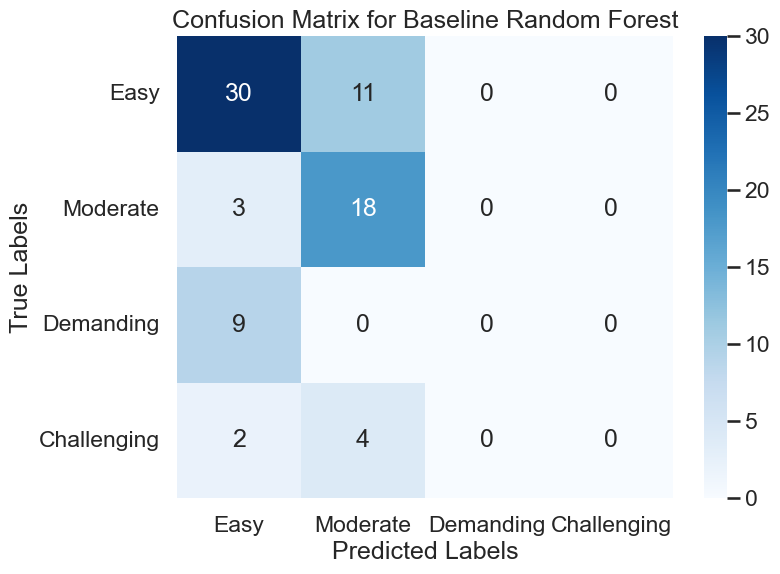

In [132]:
# Confusion matrix for the baseline Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'])
plt.title("Confusion Matrix for Baseline Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Decision Trees Sample Visualization

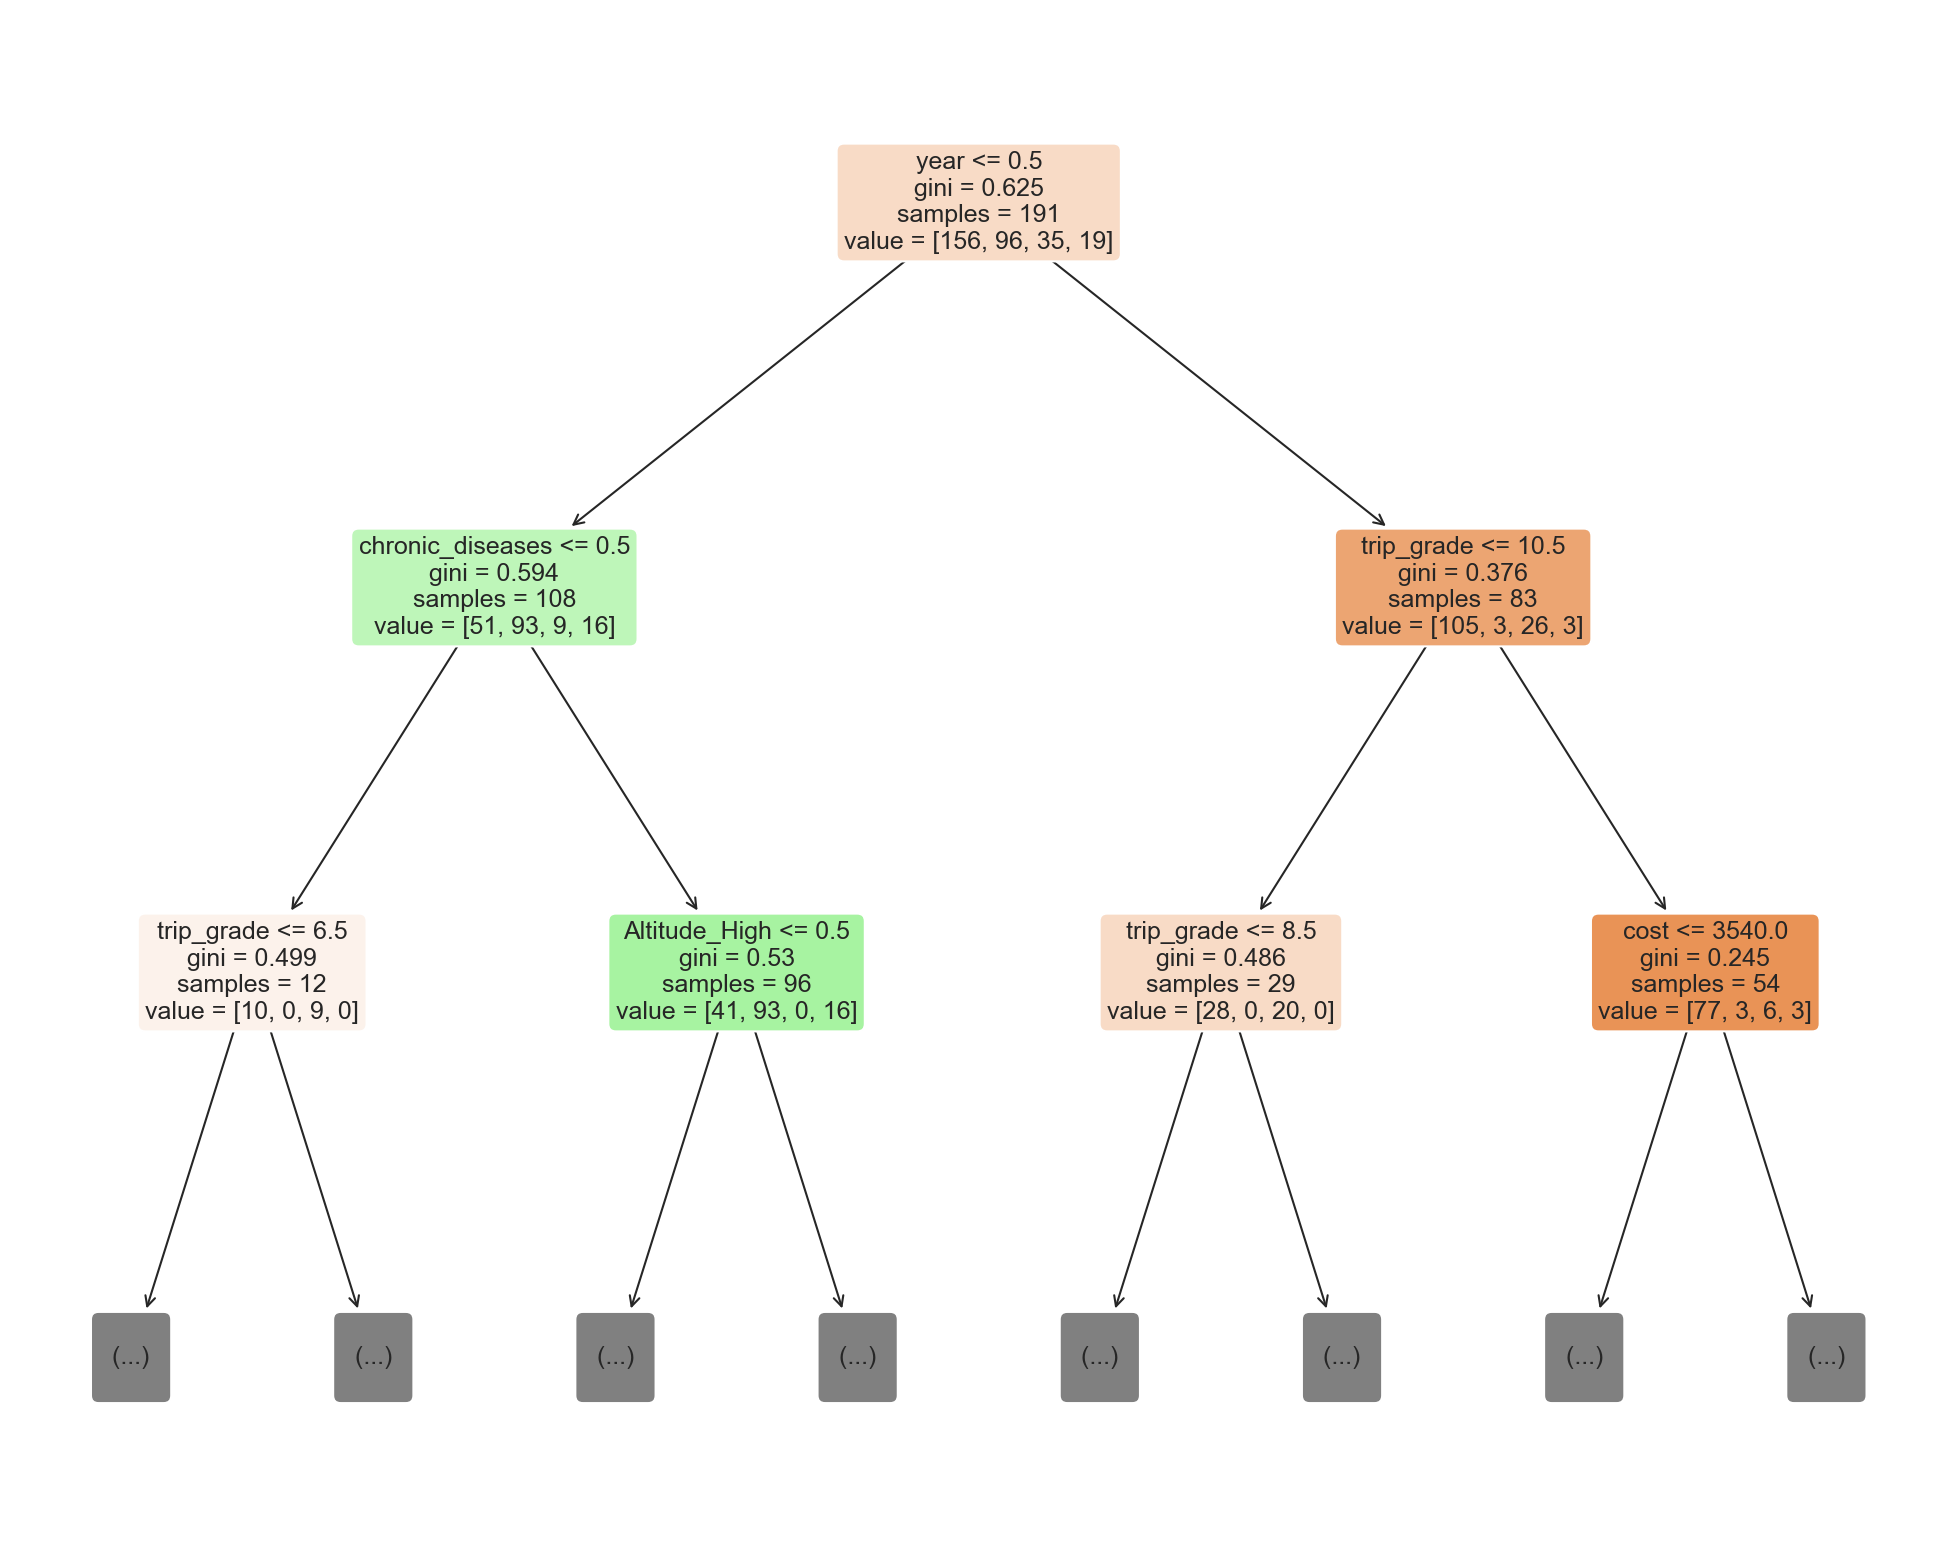

In [133]:
feature_names = ['cost', 'trip_grade', 'age', 'annual_income', 'chronic_diseases', 
                 'ever_travelled_abroad', 'year', 'Altitude_High', 'Altitude_Medium', 
                 'travel_day', 'gender_Male', 'gender_Transgender', 'Feb_encoded', 
                 'Apr_encoded', 'Jun_encoded', 'Aug_encoded', 'Oct_encoded', 'Dec_encoded']

# Plot the first tree in the random forest model for visualization
plt.figure(figsize=(25, 20))
plot_tree(rf_clf.estimators_[0],
          feature_names=feature_names, 
          filled=True,
          rounded=True,
          fontsize=18,
          max_depth=2)
plt.show()

### Hyperparameter Tuning 

In [134]:
# Step 3: Hyperparameter Tuning with GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(
    random_state=42,  
    n_estimators=300,        
    max_depth=3,           
    min_samples_split=2,      
    min_samples_leaf=2,       
    max_features='sqrt'
    ), 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train, y_train)

# Best parameters and best score from GridSearch
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Accuracy from GridSearchCV:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy from GridSearchCV: 0.8593865679534638


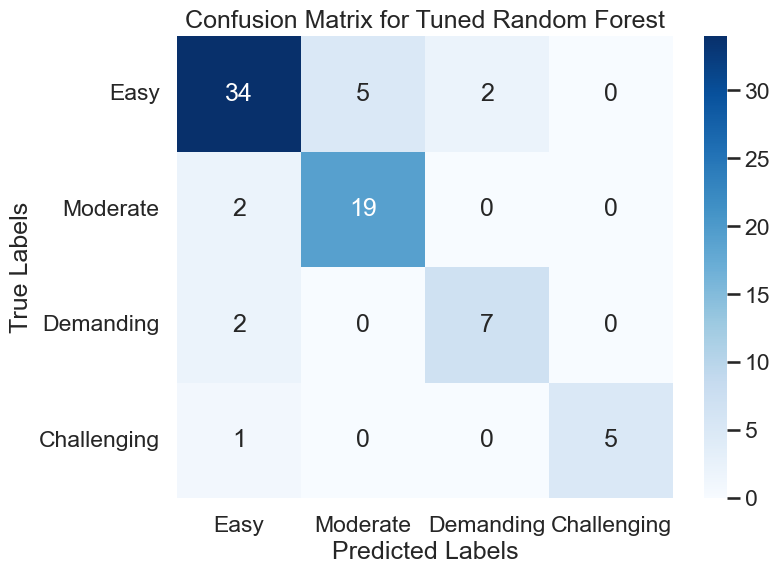

In [135]:
# Use the best estimator to predict on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_weighted_rf = best_rf_model.predict(X_test)

# Confusion matrix for the tuned Random Forest
conf_matrix_weighted_best = confusion_matrix(y_test, y_pred_best_weighted_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_weighted_best, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], 
    yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging']
)
plt.title("Confusion Matrix for Tuned Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Implementing Extreme Gradient Boosting Classifier

In [136]:
# Initializing the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the XGBoost model performance
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.8961038961038961

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.83      0.90      0.86        21
           2       0.90      1.00      0.95         9
           3       1.00      0.83      0.91         6

    accuracy                           0.90        77
   macro avg       0.91      0.90      0.91        77
weighted avg       0.90      0.90      0.90        77



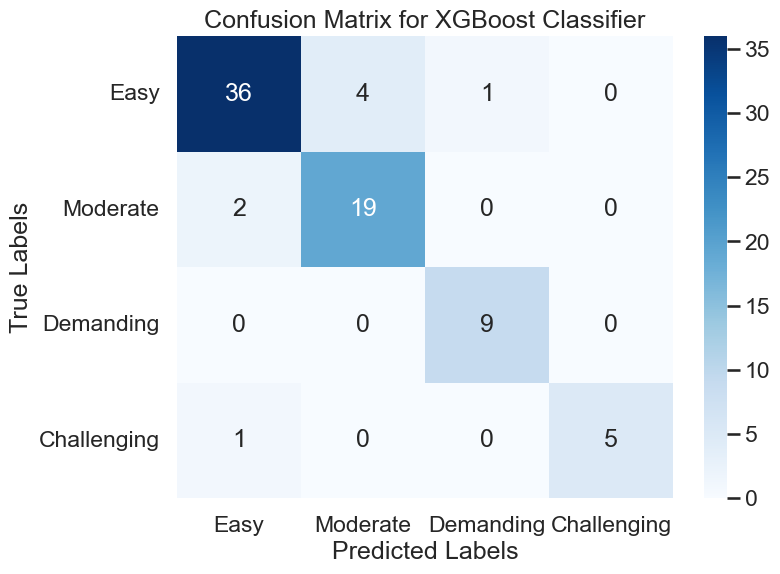

In [137]:
# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'])
plt.title("Confusion Matrix for XGBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Model Evaluation Visualizations

### Model Accuracy Comparison

In [138]:
model_names = ['Logistic Regression', 'Random Forest', 'Tuned Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg), 
    accuracy_score(y_test, y_pred_rf),
    grid_search.best_score_,
    accuracy_score(y_test, y_pred_xgb)
]

# Create the interactive bar chart
fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=model_names, y=accuracies, marker_color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA'])
])

fig.update_layout(
    title='Model Accuracy Comparison',
    xaxis_title='Models',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0, 1]),
    font=dict(size=14)
)

# Show the interactive plot
fig.show()

### Precision, Recall, and F1-Score Comparison by Class

In [139]:
# Data for metrics, same as above but in dictionary format for Plotly
metrics = {
    'Model': ['Logistic Regression'] * 3 + ['Random Forest'] * 3 + ['XGBoost'] * 3,
    'Metric': ['Precision', 'Recall', 'F1-Score'] * 3,
    'Easy': [0.70, 0.82, 0.70, 0.84, 0.86, 0.84, 0.83, 0.92, 0.87],
    'Moderate': [0.00, 0.00, 0.00, 0.78, 0.27, 0.40, 0.82, 0.79, 0.81],
    'Demanding': [0.33, 0.07, 0.12, 0.86, 0.64, 0.75, 0.92, 0.79, 0.85],
    'Challenging': [0.00, 0.00, 0.00, 1.00, 0.50, 0.67, 1.00, 0.62, 0.77]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)
df_melted = df_metrics.melt(id_vars=['Model', 'Metric'], var_name='Class', value_name='Score')

# Interactive grouped bar chart
fig = px.bar(df_melted, x='Class', y='Score', color='Model', barmode='group', facet_row='Metric',
             category_orders={'Metric': ['Precision', 'Recall', 'F1-Score']},
             color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'])

fig.update_layout(
    title='Precision, Recall, and F1-Score Comparison by Class',
    yaxis=dict(range=[0, 1]),
    font=dict(size=12)
)

fig.show()


In [140]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train models on the training set
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

In [141]:
# Print performance metrics for each model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.5974025974025974

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.52      0.76      0.62        21
           2       0.50      0.11      0.18         9
           3       0.00      0.00      0.00         6

    accuracy                           0.60        77
   macro avg       0.42      0.40      0.37        77
weighted avg       0.55      0.60      0.55        77



In [142]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8571428571428571

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.79      0.90      0.84        21
           2       0.80      0.89      0.84         9
           3       1.00      0.83      0.91         6

    accuracy                           0.86        77
   macro avg       0.87      0.86      0.86        77
weighted avg       0.86      0.86      0.86        77



In [143]:
print("\nXGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Accuracy: 0.8961038961038961

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.83      0.90      0.86        21
           2       0.90      1.00      0.95         9
           3       1.00      0.83      0.91         6

    accuracy                           0.90        77
   macro avg       0.91      0.90      0.91        77
weighted avg       0.90      0.90      0.90        77



### Confusion Matrices for all Models

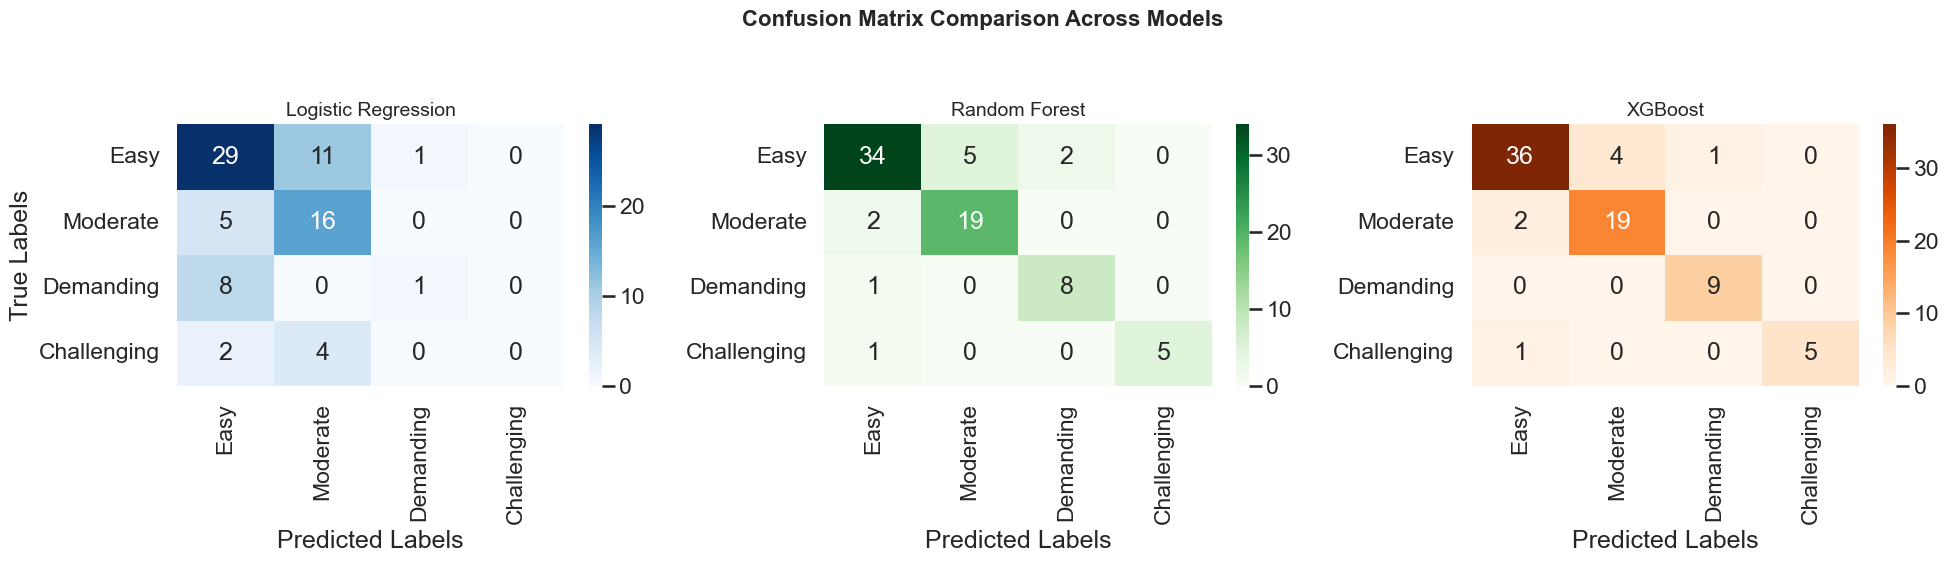

In [144]:
# Generate confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot side-by-side confusion matrices with styling
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Confusion Matrix Comparison Across Models", fontsize=16, fontweight='bold')

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'])
axes[0].set_title('Logistic Regression', fontsize=14)
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'])
axes[1].set_title('Random Forest', fontsize=14)
axes[1].set_xlabel('Predicted Labels')

# XGBoost Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2], xticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'], yticklabels=['Easy', 'Moderate', 'Demanding', 'Challenging'])
axes[2].set_title('XGBoost', fontsize=14)
axes[2].set_xlabel('Predicted Labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()